# DMP-02: Introduction to OOP
#### Author and Instructor:  Ashutosh Dave, FRM

## Agenda for today's session
#### Part 1: Intro to OOP concepts
- Dunders
- Intro to and advantages of OOP
- Class: Class-variables/attributes & class-methods
- Object/Instance: Instance-variables/attributes & instance-methods
- Static methods
- Inheritance
- Some useful functions
- The 'super' keyword
- Multiple inheritance

#### Part 2: Application of OOP in backtesting a trading strategy
- Example of backtesting a trading strategy in OOP format
- Using inheritance to create new/modify existing strategies
- Testing multiple strategies on the same stock
- Testing the same strategy on multiple stocks

## Approach for this session:
- Intuitive understanding of OOP concepts
- Practical implementation of OOP for quant trading/analysis
- Examples

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

# Part 1: Intro to OOP concepts

## Dunders

- In-built methods/attributes with some special characteristics, 
- but for all practical purposes, you can treat them as normal methods/attributes only

In [2]:
a = 2

In [3]:
a + 2

4

In [4]:
# a+2 calls the following behind the scene
a.__add__(2)

4

In [5]:
b = [1,2,3]

In [6]:
len(b)

3

In [7]:
# len(b) utilizes the following behind the scene
b.__len__()

3

In [8]:
import numpy as np

In [9]:
#dir(np)

In [10]:
np.__version__
np.__package__

'1.18.5'

'numpy'

In [11]:
print(np.__doc__)
#dir(np)


NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >>> x = x + 1

Use the built-in ``help`` function to view a function's docstring::

  >>> help(np.sort)
  ... # doctest: +SKIP

For some objects, ``np.info(obj)`` may provide additional help.  This is
particularl

In [12]:
# When we try to create an object of a class, we need a constructor,
# which is the __init__ dunder method

## Intro to Object orientation

Object-orientation is a way of programming where we work by **defining a template of the generalized concept** of something along with its associated attributes and methods.

**We call this generalized concept a 'class'**, which is like a **template or blueprint** which can be used to create specific instances of that generalized concept. These **specific instances are called 'objects'.**

**Everything in Python is an 'object'.**

## Why use OOP?

- Get data and functions required for a task under one **systematic structure**
- Classes are **highly flexible**, so later on you can easily modify or build upon existing classes to extend your opertions
- **Leveraging existing code** saves time

In [13]:
# Python comes with some built-in classes, such as int, str, list, float, function etc.
# 2 objects of the 'float' class
a = 4.3
b = 3.2

type(a)
type(b)

float

float

In [14]:
#attribute/property linked to the class 'float'
a.imag

0.0

In [15]:
#method linked to the class 'float'
a.is_integer()

False

## Creating custom classes and objects

### Class: 
- class-attributes 
- class-methods

In [16]:
# Class variables/attributes and class-methods belong to the class itself and do not vary based on the instances
# However, it is possible to change a class variable for an object

In [47]:
class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
        

In [48]:
# All instances of the class will have the class properties unless changed

# instantiating an object 'a'
a=student()
a.goal
a.print_goal()

# instantiating an object 'b'
b=student()
b.goal
b.print_goal()

'get educated'

get educated
learn, earn and enjoy!


'get educated'

get educated
learn, earn and enjoy!


In [19]:
# changing attribute value for b
b.goal='get educated plus get a job'
b.goal

'get educated plus get a job'

In [20]:
# changing method for b
def dough():
    return 'make_money!'
b.print_goal = dough 

b.print_goal()

'make_money!'

### Object/instance: 
 - instance-attributes 
 - instance-methods

In [21]:
# instance variables are owned by the instance/object of the class
# so they vary depending on the details of the specific objects

In [22]:
# instance methods can access unique data/variables of an instance/object
# instance methods are most common type of methods you will find in a class

In [23]:
# pay attention to the '__init__' constructor and the 'self' word

class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
    
    # initialization function required to construct different objects/instances
    def __init__(self, science_marks, arts_marks):  
        self.science = science_marks    # instance attribute 1
        self.arts = arts_marks    #  instance attribute 2
        
    def total_score(self):  # instance method
        print('Total score is:',self.science+self.arts )
    

In [24]:
#object/instance of class 'dad' with specific characteristics
John = student(5,10)

In [25]:
John.total_score()

Total score is: 15


In [26]:
John.goal

'get educated'

In [27]:
# As John is an indtance of class 'student', the class attributes and class methods still hold
John.goal
John.print_goal()

'get educated'

get educated
learn, earn and enjoy!


In [28]:
# But John has some unique properties too specific to him!
#'self' has been replaced by the name of the object 'John' as seen below:
John.science
John.arts
John.total_score()

5

10

Total score is: 15


## Static methods

In [29]:
# instance methods pass 'self' as the first argument
# class methods pass 'cls' as the first argument
# static methods don't pass 'self' or 'cls', as static methods do not depend on or have access to any instance or class data
# they are just normal functions under the scope of a class

In [30]:
class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
    
    # initialization function required to construct objects/instances
    def __init__(self, science_marks, arts_marks):  
        self.science = science_marks    # instance attribute 1
        self.arts = arts_marks    #  instance attribute 2
        
    def total_score(self):  # an instance method
        print('Total score is:',self.science+self.arts )
    
    @staticmethod
    def print_current_year(year): # a static method
        print('The current year is:',year)

In [31]:
student.print_current_year(2020)

The current year is: 2020


## Inheritance: subclasses/ child classes

In [32]:
# Inherit all the attributes and methods from the parent class and also add new functionality

In [33]:
# A subclass/child class of original class 'student'
class sporty_student(student):
    pass

In [34]:
sporty_student.goal

'get educated'

In [35]:
Jack= sporty_student(45, 35)

In [36]:
Jack.total_score()

Total score is: 80


In [37]:
help(sporty_student)

Help on class sporty_student in module __main__:

class sporty_student(student)
 |  sporty_student(science_marks, arts_marks)
 |  
 |  Method resolution order:
 |      sporty_student
 |      student
 |      builtins.object
 |  
 |  Methods inherited from student:
 |  
 |  __init__(self, science_marks, arts_marks)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  total_score(self)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods inherited from student:
 |  
 |  print_goal() from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from student:
 |  
 |  print_current_year(year)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from student:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (i

In [38]:
# Customizing the subclass
class sporty_student(student): 
    goal = 'get educated and win some trophies!'

In [39]:
Jack = sporty_student(4,9)

Jack.goal

'get educated and win some trophies!'

In [40]:
Jack.total_score()

Total score is: 13


## Some useful functionalities

In [55]:
# Some functions to check
#isinstance(Jack,student)
isinstance(Jack,sporty_student)

True

In [56]:
isinstance(Jack,student)

False

In [57]:
issubclass(sporty_student,student)

False

In [58]:
# __dict__  attribute gives complete details about the properties of any object (even a class is an object in Python) in
# the form of a mapping or dictionary
Jack.__dict__

{'science': 4, 'arts': 9}

In [59]:
# family tree
# The 'object' class is the primary ancestor of all classes
sporty_student.__mro__

(__main__.sporty_student, __main__.student, object)

## The 'super' keyword 

In [60]:
# Enjoy the best of both worlds. Overwrite/customize a method in child
#but at the same time access the properties from a method of same name from parent class using super()

In [61]:
# parent class
class parent1():
    def __init__(self, age):
        self.age = age # instance 
        print('I come from parent1 __init__')
        print('My age is:',self.age)

# a subclass with no __init__ of its own
class child(parent1):
    pass        


# instance of the subclass
jack = child(5)

I come from parent1 __init__
My age is: 5


In [62]:
# parent class
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)

# A subclass with its own __init__        
class child(parent1):
    def __init__(self,grade):
        self.grade = grade
        print('I come from child __init__')  
        print('My grade is:',self.grade)

# instance of the subclass
jack = child('A')

I come from child __init__
My grade is: A


In [63]:
# parent class
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)

        
# A subclass with its own __init__  but still accessing the __init__ of its parent as well     
class child(parent1):
    def __init__(self,grade, age):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        super().__init__(age)   # accessing the __init__ of parent using super()


# instance of the subclass
jack = child('A',5)

I come from child __init__
My grade is: A
I come from parent1 __init__
My age is: 5


## Multiple inheritance

In [64]:
# What if we have more than one parent classes?
# Then, we need to call the methods from parent classes explicitly if we want to access them

In [66]:
# parent class 1
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)
        
# parent class 2
class parent2():
    def __init__(self, gender):
        self.gender = gender
Code




epat-venv

import os
import numpy as np
import pandas as pd
from datetime import datetime
from talib import RSI
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio as pf
import warnings
​
warnings.filterwarnings('ignore')
​
# To display multiple outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
​
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('max_colwidth', 400)
pd.set_option('display.expand_frame_repr', True)
​
​
%matplotlib inline
!python -V
Python 3.8.10
class Triple_SMA_Strategy():
    def __init__(self, asset, lookback_list):
        self.asset = asset
        self.lookback = lookback_list
        self.sma_high = 'sma' + str(self.lookback[0])
        self.sma_medium = 'sma' + str(self.lookback[1])
        self.sma_low = 'sma' + str(self.lookback[2])
        self.data = self.download_data(self.asset).copy()
        self.compute_indicators()
        self.signals()
        self.positions()
        self.returns()
    
    def download_data(self, ticker, start = datetime(2021, 1, 2), end = datetime(2022, 6, 30)):
        """ 
        The function downloads daily market data to a pandas DataFrame 
        using the 'yfinance' API between the dates specified. If dates are not specified
        they default from 2015 up until now. Then, It prints different metrics
        """
        data = yf.download(ticker, start, end)
        #signals:
        print(data.tail())
        print(data.shape)
        print(data.isna().sum())
        print(f"shape with NaN values: {data.shape}")
        data.dropna(inplace=True)
        print(f"shape after deleting NaN values: {data.shape}")
        
        return data
    
    def compute_indicators(self):
        """
        The function creates additional columns to an OHLC pandas DataFrame
        required to backtest the "Triple SMA" trading strategy and then display them
        """
        
        self.data["Adj Close prev_day"] = self.data["Adj Close"].shift(1)
​
        for period in self.lookback:
            self.data["sma" + str(period)] = self.data['Adj Close'].rolling(window=period, center=False).mean()
            self.data["sma" + str(period) + '_prev_day'] = self.data["sma" + str(period)].shift(1)
          
​
        # indicator to be considered for entering long positions
        self.data["sma_max"] = self.data[[self.sma_high, self.sma_medium, self.sma_low]].max(axis=1)
        self.data["sma_max_prev_day"] = self.data[[self.sma_high + '_prev_day', self.sma_medium + '_prev_day', self.sma_low + '_prev_day']].max(axis=1)
        
        # indicator to be considered for entering short positions
        self.data["sma_min"] = self.data[[self.sma_high, self.sma_medium, self.sma_low]].min(axis=1)
        self.data["sma_min_prev_day"] = self.data[[self.sma_high + '_prev_day', self.sma_medium + '_prev_day', self.sma_low + '_prev_day']].min(axis=1)
        
        self.data[['Adj Close', self.sma_high, self.sma_medium, self.sma_low]].plot(grid=True, linewidth=2, figsize=(15, 8));
        self.data.dropna(inplace=True)
        print(self.data.iloc[80:90])
        print(f"shape after deleting NaN values: {self.data.shape}")
        
    
    def signals(self):
        """
        The function computes the signal with the following rules:
        1) Go long when the price crosses above all three moving averages one minute before market closes
        2) Exit the long position when the price crosses below any of the three moving averages one minute before market closes
        3) Go short when the price crosses below all three moving averages one minute before market closes
        4) Exit the short position when the price crosses above any of the three moving averages one minute before market closes
        
        NOTE: We enter the position one minute before market closes. This implies that we are making an approximation that the "Adj Close"
        is almost the same as the Price one minute earlier. this is dome to avoid lookahead bias.
        Another option could be to enter the position at the start of the next day trading session
        """
        #signals:
        # we need three symbols to represent the states:
        #  1 for long position
        # -1 for short positions
        #  0 for idle positions
        
        self.data["signal"] = -1.1 # default signal
        
        # long position enter signal
        self.data['signal'] = np.where((self.data['Adj Close'] > self.data['sma_max']) 
                        & (self.data['Adj Close prev_day'] < self.data['sma_max_prev_day']), 1, -1.1)
        # long position exit signal
        self.data['signal'] = np.where( (self.data['Adj Close prev_day'] > self.data['sma_max_prev_day'])
                        & (self.data['Adj Close'] < self.data['sma_max']) & (self.data['Adj Close'] > self.data['sma_min']), 0, self.data['signal'])
        
        # short position enter signalfrom dataframe
        self.data['signal'] = np.where((self.data['Adj Close'] < self.data['sma_min']) 
                        & (self.data['Adj Close prev_day'] > self.data['sma_min_prev_day']), -1, self.data['signal'])
        
        # short position exit signal
        self.data['signal'] = np.where((self.data['Adj Close prev_day'] < self.data['sma_min_prev_day']) 
                        & (self.data['Adj Close'] > self.data['sma_min']) & (self.data['Adj Close'] < self.data['sma_max']), 0, self.data['signal'])
        
 
        
​
        
        print(self.data['signal'].value_counts())
        print()
        #print(self.data.loc["2021-10-01":"2021-11-30"])
    
    def positions(self):
        self.data['position'] = self.data['signal'].replace(to_replace=-1.1, method='ffill')
    
    def returns(self):
        self.data['buy_and_hold'] = self.data['Adj Close'].pct_change()
        self.data['triple_sma_strategy'] = self.data['buy_and_hold'] * self.data['position'].shift(1)
        print(f"Buy & Hold returns (simple): {((1 + self.data['buy_and_hold']).cumprod()[-1] -1) * 100:.2f}%")
        print(f"Triple SMA Strategy returns (simple): {((1 + self.data['triple_sma_strategy']).cumprod()[-1] -1) * 100:.2f}%")
        
    def analysis(self):
        # A plot to check if the strategy is working as planned:
        self.data[["Adj Close", "sma_max", "sma_min", 'position']].plot(figsize=(20, 12), secondary_y='position', grid=True);
        plt.title('checking if positions are generated properly')
        plt.show()
        
        self.data['buy_and_hold'] = 1 + self.data['buy_and_hold']
        self.data['triple_sma_strategy'] = 1 + self.data['triple_sma_strategy']
        # A plot to check how the strategy strategy performs relative to buy & hold
        self.data[['buy_and_hold','triple_sma_strategy']].cumprod().plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title("Buy & Hold' vs 'crossover strategy' cumulative returns")
        plt.show()
    
    def optimize_strategy(self):
        pass
    
    
asset= "SPY"
lookback_list =[20, 40, 80]
triple_sma_strategy = Triple_SMA_Strategy(asset, lookback_list)
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-06-23  376.640015  378.829987  372.890015  378.059998  378.059998   
2022-06-24  381.399994  390.089996  381.369995  390.079987  390.079987   
2022-06-27  391.049988  391.359985  387.440002  388.589996  388.589996   
2022-06-28  390.230011  393.160004  380.529999  380.649994  380.649994   
2022-06-29  381.230011  382.269989  378.420013  380.339996  380.339996   

              Volume  
Date                  
2022-06-23  79292100  
2022-06-24  97860000  
2022-06-27  66009600  
2022-06-28  86548900  
2022-06-29  65676000  
(375, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
shape with NaN values: (375, 6)
shape after deleting NaN values: (375, 6)
                  Open        High         Low       Close   Adj Close  ...  \
Date                                                                    ...   
2021-08-23  445.160004  448.230011  443.440002  447.260010  440.990021  ...   
2021-08-24  447.970001  448.540009  447.420013  447.970001  441.690063  ...   
2021-08-25  448.170013  449.459991  447.769989  448.910004  442.616882  ...   
2021-08-26  448.609985  448.859985  446.160004  446.260010  440.004059  ...   
2021-08-27  447.119995  450.649994  447.059998  450.250000  443.938110  ...   
2021-08-30  450.970001  453.070007  450.709991  452.230011  445.890350  ...   
2021-08-31  452.130005  452.489990  450.920013  451.559998  445.229736  ...   
2021-09-01  452.559998  453.109985  451.549988  451.799988  445.466370  ...   
2021-09-02  453.320007  454.049988  451.910004  453.190002  446.836914  ...   
2021-09-03  451.980011  453.630005  451.549988  453.079987  446.728424  ...   

            sma80_prev_day     sma_max  sma_max_prev_day     sma_min  \
Date                                                                   
2021-08-23      421.343975  435.767271        435.459645  421.696091   
2021-08-24      421.696091  436.208990        435.767271  422.090863   
2021-08-25      422.090863  436.705927        436.208990  422.486163   
2021-08-26      422.486163  436.982495        436.705927  422.880498   
2021-08-27      422.880498  437.561266        436.982495  423.322411   
2021-08-30      423.322411  438.283005        437.561266  423.747943   
2021-08-31      423.747943  438.796208        438.283005  424.127749   
2021-09-01      424.127749  439.428221        438.796208  424.561863   
2021-09-02      424.561863  439.991710        439.428221  425.058929   
2021-09-03      425.058929  440.513788        439.991710  425.662745   

            sma_min_prev_day  
Date                          
2021-08-23        421.343975  
2021-08-24        421.696091  
2021-08-25        422.090863  
2021-08-26        422.486163  
2021-08-27        422.880498  
2021-08-30        423.322411  
2021-08-31        423.747943  
2021-09-01        424.127749  
2021-09-02        424.561863  
2021-09-03        425.058929  

[10 rows x 17 columns]
shape after deleting NaN values: (295, 17)
-1.1    248
 0.0     23
 1.0     13
-1.0     11
Name: signal, dtype: int64

Buy & Hold returns (simple): -7.87%
Triple SMA Strategy returns (simple): 3.72%

triple_sma_strategy.analysis()








​
​
​










Code




epat-venv

DMP-01 Solution
import all the needed packages
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
​
warnings.filterwarnings('ignore')
​
# To display multiple outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
​
%matplotlib inline
!python -V
Python 3.8.10
PREMISE: Use the adjusted close price of MSFT from January 2nd 2015 to April 30th 2020 for questions 1 to 4.
ticker = "MSFT"
start = datetime(2015, 1, 2)
end = datetime(2020, 4, 30)
def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data
df = download_daily_data(ticker, start, end)
[*********************100%***********************]  1 of 1 completed
df.head()
df.tail()
df.shape
Open	High	Low	Close	Adj Close	Volume
Date						
2015-01-02	46.660000	47.419998	46.540001	46.759998	41.013306	27913900
2015-01-05	46.369999	46.730000	46.250000	46.330002	40.636158	39673900
2015-01-06	46.380001	46.750000	45.540001	45.650002	40.039726	36447900
2015-01-07	45.980000	46.459999	45.490002	46.230000	40.548454	29114100
2015-01-08	46.750000	47.750000	46.720001	47.590000	41.741314	29645200
Open	High	Low	Close	Adj Close	Volume
Date						
2020-04-23	174.110001	175.059998	170.910004	171.419998	167.933334	32790800
2020-04-24	172.059998	174.559998	170.710007	174.550003	170.999680	34277600
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509857	33194400
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356079	34392700
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821075	51286600
(1340, 6)
Q1: Try out the ‘Big Moves Monday’ strategy on the above data with the standard conditions as taught in the class. Now back-test the strategy again but this time tweak one of the conditions such that the ‘ibs’ value must be lower than 0.8. Compare the results(total return) with the standard conditions case. Comment on the results.
df1 = df.copy()
def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Adjusted Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    
    return data
def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on Mondays" trading strategy.
    """
    # Columns created to check condition 1
    data['day'] = data.index.day_name()
    data['prev_day'] = data['day'].shift(1)
    data['four_days_after'] = data['day'].shift(-4)
    
    # Columns created to check condition 2
    data['relative_range'] = (data['High'] - data['Low']) / data['Adj Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window=25).mean()
    
    # Column created to check condition 3
    data['ibs'] = (data['Adj Close'] - data['Low']) / (data['High'] - data['Low'])
    
    return data
def backtest_strategy(data, ibs_threshold= 0.3):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)
    
    data['condition2'] = np.where((1 - data['Adj Close'] / data['Adj Close'].shift(1))
                                  >= 0.25 * data['rel_range_ma'], 1, 0)
    
    data['condition3'] = np.where(data['ibs'] < ibs_threshold, 1, 0)
    
    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)
    
    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)
    
    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)
    
    data['strategy_returns'] = data['cc_returns'] * data['position']
    
    return data
def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
​
    print('Buy and hold returns: ', np.round(data['cc_returns'].cumsum()[-1], 2))
    print('Strategy returns: ', np.round(data['strategy_returns'].cumsum()[-1], 2))
    
    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
    data[['cc_returns', 'strategy_returns']].plot(grid=True, figsize=(12, 8));
Let's use the above functions to backtest the same strategy for two different values of the ibs indicator (to avoid code repetition we have parametrized the backtest_strategy function to accept ibs as an input parameter with a default value of 0.3)
# let's make sure that there aren't any NaN or zero values
df1["Adj Close"].isnull().values.any()
count = (df1["Adj Close"] == 0).sum()
print("Count of zeros in Column  'AdjClose' : ", count)
False
Count of zeros in Column  'AdjClose' :  0
df1 = compute_daily_returns(df1)
df1.tail(3)
df1.shape
Open	High	Low	Close	Adj Close	Volume	cc_returns
Date							
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509857	33194400	-0.002869
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356079	34392700	-0.024663
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821075	51286600	0.043896
(1340, 7)
df1 = compute_indicators(df1)
df1.tail(3)
df1.shape
Open	High	Low	Close	Adj Close	Volume	cc_returns	day	prev_day	four_days_after	relative_range	rel_range_ma	ibs
Date													
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509857	33194400	-0.002869	Monday	Friday	NaN	0.021113	0.037599	-0.775042
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356079	34392700	-0.024663	Tuesday	Monday	NaN	0.037750	0.036692	-0.483108
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821075	51286600	0.043896	Wednesday	Tuesday	NaN	0.033368	0.035733	0.334668
(1340, 13)
df_strategyA= df1.copy()
df_strategyB= df1.copy()
# standard strategy with ibs < 0.3
df1_strategyA = backtest_strategy(df_strategyA)
# standard strategy with ibs < 0.8
df1_strategyB = backtest_strategy(df_strategyB, ibs_threshold=0.8)
show_backtesting_results(df1_strategyA)
Buy and hold returns:  1.44
Strategy returns:  0.74

show_backtesting_results(df1_strategyB)
Buy and hold returns:  1.44
Strategy returns:  0.68

COMMENTS: Both strategies are worse than traditional Buy&Hold (before 2017 they were quite close to each other). Standard strategy (ibs<0.3) performs slightly better than modified strategy (ibs<0.8) 74% vs. 68% Overall they are not worth it!
Q2: You have seen a strategy based on MACD indicator in the class. Now back-test the following strategy based on Bollinger bands:
(i) Create 20-day (+/- 2 standard deviations) Bollinger bands on the adjusted close price for the above equity
df = download_daily_data(ticker, start, end)
df.tail(3)
df.shape
[*********************100%***********************]  1 of 1 completed
Open	High	Low	Close	Adj Close	Volume
Date						
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509842	33194400
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356064	34392700
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821091	51286600
(1340, 6)
# let's use the Ta-lib library
from talib import BBANDS
BBANDS?
Docstring:
BBANDS(real[, timeperiod=?, nbdevup=?, nbdevdn=?, matype=?])

Bollinger Bands (Overlap Studies)

Inputs:
    real: (any ndarray)
Parameters:
    timeperiod: 5
    nbdevup: 2
    nbdevdn: 2
    matype: 0 (Simple Moving Average)
Outputs:
    upperband
    middleband
    lowerband
Type:      function
# let's calculate the Bollinger Bands and plot them
dfbb=df.copy()
# we don't need the mid band and use '_' to esclude the column
dfbb['UpperBB'], _, dfbb['LowerBB'] = BBANDS(dfbb["Adj Close"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
dfbb[['Adj Close', 'UpperBB', 'LowerBB']].plot(grid=True, linewidth=2, figsize=(15, 8));

dfbb.tail()
dfbb.shape
Open	High	Low	Close	Adj Close	Volume	UpperBB	LowerBB
Date								
2020-04-23	174.110001	175.059998	170.910004	171.419998	167.933350	32790800	178.273651	144.870186
2020-04-24	172.059998	174.559998	170.710007	174.550003	170.999680	34277600	179.164710	145.785619
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509842	33194400	179.020649	148.315151
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356064	34392700	179.213678	149.060634
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821091	51286600	180.061662	150.144540
(1340, 8)
(ii) Buy when the price crosses the lower band from top and hold until the price crosses the upper band from below the next time.
(iii) Sell when the price crosses the upper band from below and hold until the price crosses the lower band from top the next time.
(iv) Once we get into a trade, we always have an open position at all times.
NOTE: we are not taking into consideration look-ahead bias (to avoid the problem we may enter the position 5 minutes before the close of the trading session or we could enter the position at the 'Open' of the next day. For simplicity let's go with the first approach)
def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Bollinger Bands" trading strategy.
    """
    # Columns created to check condition (ii) & (iii):
    data['previous Adj Close'] = data['Adj Close'].shift(1)
    data['up_prev_day'] = data['UpperBB'].shift(1)
    data['low_prev_day'] = data['LowerBB'].shift(1)
    
    # condition (ii):
    data['signal'] = np.where((data['previous Adj Close'] >  data['low_prev_day']) 
                        & (data['Adj Close'] < data['LowerBB']), 
                            1, 0)
    
    # condition (iii):
    data['signal'] = np.where((data['previous Adj Close'] <  data['up_prev_day']) 
                          & (data['Adj Close'] > data['UpperBB']), 
                            -1, data['signal'])
    
    # condition (iv):
    data['position'] = data['signal'].replace(to_replace=0, method='ffill')
    
    dfbb[["Adj Close", "LowerBB", "UpperBB", "position"]].plot(grid=True, secondary_y = "position",figsize=(12, 8));
    
    data['position'] =  data['position'].shift(1)
    
    return data
#df1=compute_daily_returns(df1)
dfbb= compute_indicators(dfbb)
dfbb.tail()
dfbb['signal'].value_counts()
dfbb['position'].value_counts()
dfbb.shape
Open	High	Low	Close	Adj Close	Volume	UpperBB	LowerBB	previous Adj Close	up_prev_day	low_prev_day	signal	position
Date													
2020-04-23	174.110001	175.059998	170.910004	171.419998	167.933350	32790800	178.273651	144.870186	169.990631	178.464075	142.279594	0	1.0
2020-04-24	172.059998	174.559998	170.710007	174.550003	170.999680	34277600	179.164710	145.785619	167.933350	178.273651	144.870186	0	1.0
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509842	33194400	179.020649	148.315151	170.999680	179.164710	145.785619	0	1.0
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356064	34392700	179.213678	149.060634	170.509842	179.020649	148.315151	0	1.0
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821091	51286600	180.061662	150.144540	166.356064	179.213678	149.060634	0	1.0
 0    1261
-1      55
 1      24
Name: signal, dtype: int64
-1.0    827
 1.0    465
 0.0     47
Name: position, dtype: int64
(1340, 13)

# uncomment these lines to check for buy/sell conditions
#dfbb.iloc[45:50]
#dfbb.iloc[73:80]
#dfbb.iloc[102:110]






# let's calculate the strategy returns
def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Bollinger Bands" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    
    data['buy_and_hold'] = data['Adj Close'].pct_change()
    data['bbands_strategy'] = data['buy_and_hold'] * data['position']
    
    print(f"Buy&Hold returns (simple): {((1 + data['buy_and_hold']).cumprod()[-1] -1) * 100:.2f}%")
    print(f"BBANDS Strategy returns (simple): {((1 + data['bbands_strategy']).cumprod()[-1] -1) * 100:.2f}%")
    
    data['buy_and_hold'] = 1 + data['buy_and_hold']
    data['bbands_strategy'] = 1 + data['bbands_strategy']
​
    data[['buy_and_hold', 'bbands_strategy']].cumprod().plot(grid=True, figsize=(12, 8));
    print("\nNOTE: the total Returns of the strategy is the same calculated with pyfolio.")
    
    return data
dfbb= backtest_strategy(dfbb)
Buy&Hold returns (simple): 323.82%
BBANDS Strategy returns (simple): 43.22%

NOTE: the total Returns of the strategy is the same calculated with pyfolio.

# uncomment these lines to check for buy/sell conditions
#dfbb.iloc[43:50]
#dfbb.iloc[73:80]
#dfbb.iloc[102:110]
Compare the total returns of the above strategy with a simple ‘buy & hold’ strategy. Comment on your findings.
COMMENTS: The standard bollinger Band strategy is worse (+50%) than the Buy&Hold strategy (+144%). Th BB strategy is based on the condition that prices follow the Normal distribution while generally the distribution of the Returns has fatter tails than the normal one.
Q3: Write a customized function that computes returns for the exponential moving average (EMA) strategy (discussed in class) for different windows(spans). Find the optimal value of span between 1 and 30 which produces the best overall total return.
df = download_daily_data(ticker, start, end)
df.tail(3)
df.shape
dfexp = df.copy()
[*********************100%***********************]  1 of 1 completed
Open	High	Low	Close	Adj Close	Volume
Date						
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509842	33194400
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356064	34392700
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821091	51286600
(1340, 6)
def ema_calculation(df, ema):
    df["cc_returns"] = df["Adj Close"].pct_change()
    df["ema"] = df["Adj Close"].ewm(span=ema, adjust=False).mean()
    df["position"] = np.where((df["Adj Close"] > df["ema"]), 1, 0)
    df["position"] = df["position"].shift(1)
    df["strategy_returns"] = df["cc_returns"] * df["position"]
    df["strategy_returns"] = 1 + df["strategy_returns"]
    print(f"Strategy returns for ema = {ema}: {np.round(df['strategy_returns'].cumprod()[-1] - 1, 2) * 100:.2f}%")
    
    #df['log_returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    #df["strategy_logreturns"] = df["log_returns"] * df["position"]
    #print(f"Strategy returns for ema = {ema}: {np.round(df['strategy_logreturns'].cumsum()[-1], 8)}")
    
    return np.round(df['strategy_returns'].cumprod()[-1], 2)
​
            
returns = [] 
for i in range(1, 31):
    strategy_return = ema_calculation(dfexp, i)
    returns.append((i, strategy_return))
​
optimal_param = max(returns, key=lambda item: item[1])
    
print(f"\nOptimal parameter for the EMA Strategy is: {optimal_param[0]}")
Strategy returns for ema = 1: 0.00%
Strategy returns for ema = 2: 19.00%
Strategy returns for ema = 3: -2.00%
Strategy returns for ema = 4: 2.00%
Strategy returns for ema = 5: -11.00%
Strategy returns for ema = 6: -10.00%
Strategy returns for ema = 7: -5.00%
Strategy returns for ema = 8: -17.00%
Strategy returns for ema = 9: -9.00%
Strategy returns for ema = 10: 3.00%
Strategy returns for ema = 11: 28.00%
Strategy returns for ema = 12: 31.00%
Strategy returns for ema = 13: 37.00%
Strategy returns for ema = 14: 54.00%
Strategy returns for ema = 15: 50.00%
Strategy returns for ema = 16: 42.00%
Strategy returns for ema = 17: 38.00%
Strategy returns for ema = 18: 41.00%
Strategy returns for ema = 19: 40.00%
Strategy returns for ema = 20: 35.00%
Strategy returns for ema = 21: 22.00%
Strategy returns for ema = 22: 23.00%
Strategy returns for ema = 23: 17.00%
Strategy returns for ema = 24: 20.00%
Strategy returns for ema = 25: 30.00%
Strategy returns for ema = 26: 33.00%
Strategy returns for ema = 27: 26.00%
Strategy returns for ema = 28: 30.00%
Strategy returns for ema = 29: 25.00%
Strategy returns for ema = 30: 24.00%

Optimal parameter for the EMA Strategy is: 14
# plot the the Strategy Returns vs. lookback period
idx, values = zip(*returns)
pd.Series(values, idx).plot(grid=True, figsize=(15, 5));

NOTE: From the graph it can be seen that the max (lookback=14) is unstable. In other words with a litlle variation in the real trading conditions (something that almost always happens) optimal parameters could change leading to a sharp decrease in the Strategy Returns (as depicted in the graph above). From this point of view it would be preferable a max located in a flat area (for instance at around 22).
dfexp_opt= df.copy()
ema_calculation(dfexp_opt, optimal_param[0])
dfexp_opt.shape
Strategy returns for ema = 14: 54.00%
1.54
(1340, 10)
COMMENTS: We can see that the optimal parameter that produces the maximum return for the EMA is with 14 days. The strategy gives us 54% of return.
dfexp_opt[['strategy_returns']].cumprod().plot(grid=True, figsize=(15, 8));

Q4: The moving average crossover (MAC) code is implemented where we always have an open position. Calculate returns where short selling is not allowed. Plot a graph comparing returns from buy-and-hold, no short selling, and the one we did in class. Comment on your results.
def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data
ticker = "MSFT"
start = datetime(2015, 1, 2)
end = datetime(2020, 4, 30)
df = download_daily_data(ticker, start, end)
df.head(3)
df.shape
df_mac = df.copy()
[*********************100%***********************]  1 of 1 completed
Open	High	Low	Close	Adj Close	Volume
Date						
2015-01-02	46.660000	47.419998	46.540001	46.759998	41.013306	27913900
2015-01-05	46.369999	46.730000	46.250000	46.330002	40.636158	39673900
2015-01-06	46.380001	46.750000	45.540001	45.650002	40.039726	36447900
(1340, 6)
def compute_indicators(data, m=50, n=200):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "MAC" trading strategies.
    """
    data['sma50'] = data['Adj Close'].rolling(window=m).mean()
    data['sma200'] = data['Adj Close'].rolling(window=n).mean()
    
    data['sma50'] = data['sma50'].shift(1)
    data['sma200'] = data['sma200'].shift(1)
    
    data['sma50_prev_day'] = data['sma50'].shift(1)
    data['sma200_prev_day'] = data['sma200'].shift(1)
    
    data['buy_sell_signal'] = np.where((data['sma50'] > data['sma200']) & \
                            (data['sma50_prev_day'] < data['sma200_prev_day']), 1, 0)
    data['buy_sell_signal'] = np.where((data['sma50'] < data['sma200']) & \
            (data['sma50_prev_day'] > data['sma200_prev_day']), -1, data['buy_sell_signal'])
    
    data['buy_sell_position'] = data['buy_sell_signal'].replace(to_replace=0, method='ffill')
    
    data['buy_only_position'] = np.where((data['sma50'] > data['sma200']) & \
                            (data['sma50_prev_day'] < data['sma200_prev_day']), 1, 0)
    
    return data
# let's calculate the strategies returns
def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "MAC" trading strategies. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    
    data['buy_hold'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    data['buy_and_sell_returns'] = data['buy_hold'] * data['buy_sell_position'].shift(1)
    data['buy_only_returns'] = data['buy_hold'] * data['buy_only_position'].shift(1)
    
    data[['buy_hold', 'buy_and_sell_returns','buy_only_returns']].cumsum().plot(figsize=(12, 8), grid=True)
    
    logreturns = np.round((data['buy_hold']).cumsum()[-1], 2)
    print(f'"Buy and hold" Strategy logreturns: {logreturns} converted to simple returns: {(np.exp(logreturns) - 1) * 100:.2f}%')
    logreturns = np.round((data['buy_and_sell_returns']).cumsum()[-1], 2)
    print(f'"MAC buy and sell" Strategy logreturns: {logreturns} converted to simple returns: {(np.exp(logreturns) - 1) * 100:.2f}%')
    logreturns = np.round((data['buy_only_returns']).cumsum()[-1], 2)
    print(f'"MAC buy only" Strategy logreturns: {logreturns} converted to simple returns: {(np.exp(logreturns) - 1) * 100:.2f}%')
    print("\nNOTE: the total simple Returns of the three strategies are the same calculated with pyfolio. \nIn PyFolio we reported only one strategy (MAC Buy & Sell) to show the equivalence of the cumulated simple returns") 
    
    # we need these columns for using pyfolio to show the equivalence of the two approaches. It accepts only simple returns
    data['simple_returns'] = data['Adj Close'].pct_change()
    data["buy_and_sell_returns_py"] =  data['simple_returns'] * data['buy_sell_position'].shift(1)
    #data["buy_only_returns_py"] =  data['simple_returns'] * data['buy_only_position'].shift(1)
    
    return data
df_mac = compute_indicators(df_mac)
df_mac["buy_sell_signal"].value_counts()
df_mac['buy_sell_position'].value_counts()
 0    1336
-1       2
 1       2
Name: buy_sell_signal, dtype: int64
 1    926
 0    375
-1     39
Name: buy_sell_position, dtype: int64
df_mac["buy_sell_position"].plot(figsize=(12, 8), grid=True);

df_mac = backtest_strategy(df_mac)
"Buy and hold" Strategy logreturns: 1.44 converted to simple returns: 322.07%
"MAC buy and sell" Strategy logreturns: 1.02 converted to simple returns: 177.32%
"MAC buy only" Strategy logreturns: 0.03 converted to simple returns: 3.05%

NOTE: the total simple Returns of the three strategies are the same calculated with pyfolio. 
In PyFolio we reported only one strategy (MAC Buy & Sell) to show the equivalence of the cumulated simple returns

COMMENTS: From the graph we can see that the best strategy is "Buy & Hold" with a 144% over five years followed buy the "Buy & Sell" strategy that gives us 102% of logReturn and last is "Buy only" strategy with only 3% of logReturn due to the fact that there are only 2 buy signals over the entire period.
Q5: Download the data for the following companies TSLA, NFLX, AMZN, GOOG and CVX using the code for automatically downloading multiple stocks from January 1st 2015 to April 30th 2020. You can use Yahoo Finance for downloading the data.
For the above mentioned time period:
a) Compute the daily returns (assuming you buy at open and sell at close) every day.
b) Compute the hit ratio for each of them (recall that the hit ratio is the ratio of number of positive trades to total number of trades).
c) Compute the cumulative returns for each of them.

Plot them graphically and comment on your results.
tickers = ["TSLA", "NFLX", "AMZN", "GOOG", "CVX"]
#tickers = ["TSLA", 'NFLX']
start = datetime(2015, 1, 1)
end = datetime(2020, 4, 30)
​
def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data
​
def compute_daily_returns(data):
    """ 
    Compute the daily returns (buy at open and sell at close) every day.
    """
    
    data['oc_returns'] = data['Close'] / data['Open'] -1
    
    return data
​
def compute_hit_ratio(data):
    """ 
    Compute the hit ratio of data
    (hit ratio is the ratio of number of positive trades to total number of trades).
    """
    data['positive_trades'] =  np.where((data['oc_returns'] > 0), 1, 0)
    data["cum_positive_trades"] = data['positive_trades'].cumsum()
    hit_ratio =  (data.iloc[-1, data.columns.get_loc("cum_positive_trades")] / data.shape[0]) * 100
    print(f"Hit Ratio for ticker {ticker} is: {hit_ratio:.2f}%")
    
    return data
​
def compute_cumulative_returns(data):
    """ 
    Compute the cumulative returns of data
    
    """
    data["strategy_returns"] = 1 + data['oc_returns']
    data[ticker + "_returns"] = data['strategy_returns'].cumprod()
    print(f"Strategy Return for ticker {ticker} is: {data['strategy_returns'].cumprod()[-1]:.2f}")
    
    return data
​
def plot_and_compare(dict_of_tickers):
    """ 
    Plot the cumulative returns of data from a dict of tickers
    
    """
    for _, values in dict_of_tickers.items():
        values.plot(grid=True, figsize=(15, 10));
    
    plt.legend(loc="upper left")
    plt.show()
    
​
dict_of_tickers = {}
for ticker in tickers:
    
    data = download_daily_data(ticker, start, end)
    data = compute_daily_returns(data)
    data = compute_hit_ratio(data)
    data = compute_cumulative_returns(data)
    dict_of_tickers[ticker] = data[ticker + "_returns"]
​
plot_and_compare(dict_of_tickers)
[*********************100%***********************]  1 of 1 completed
Hit Ratio for ticker TSLA is: 50.78%
Strategy Return for ticker TSLA is: 1.85
[*********************100%***********************]  1 of 1 completed
Hit Ratio for ticker NFLX is: 48.70%
Strategy Return for ticker NFLX is: 1.85
[*********************100%***********************]  1 of 1 completed
Hit Ratio for ticker AMZN is: 49.81%
Strategy Return for ticker AMZN is: 0.93
[*********************100%***********************]  1 of 1 completed
Hit Ratio for ticker GOOG is: 51.90%
Strategy Return for ticker GOOG is: 1.54
[*********************100%***********************]  1 of 1 completed
Hit Ratio for ticker CVX is: 48.40%
Strategy Return for ticker CVX is: 0.91

COMMENTS: From the graph above we can see that the stocks that performed best were TSLA (Tesla) and NFLX (NetFlix) with an whopping Return of 85% over the period. The were followed by Google with a 54% Return. The remaining stocks were not worth the investment since they produced negative returns. It's worth mentioning that NFLX outperformed the remaining stocks by far up until late 2018.
As for the hit ratio of the stocks they are similar to each other but with very different performance.
NOTE: we are not taking into consideration look-ahead bias (to avoid the problem we may enter the position 5 minutes before the close of the trading session or we could enter the position at the 'Open' of the next day. For simplicity let's go with the first approach)
OPTIONAL:
Q6: Try creating the simple/ full tear sheets using the pyfolio library for questions 1 to 4. Compare various performance and risk metrics for the EMA, the MAC and the Bollinger band strategy.
import pyfolio as pf
NOTE: The method: "create_full_tear_sheet()" accepts simple returns as input. So we need to provide the right column to the method in order to make correct its it computations.
Performance for EMA strategy
#pf.create_full_tear_sheet(dfexp_opt["strategy_returns"] - 1 ,benchmark_rets=None)
Performance for MAC strategies
pf.create_full_tear_sheet(df_mac["buy_and_sell_returns_py"], benchmark_rets=None)
Start date	2015-01-02
End date	2020-04-29
Total months	63
Backtest
Annual return	21.093%
Cumulative returns	176.678%
Annual volatility	23.401%
Sharpe ratio	0.94
Calmar ratio	0.75
Stability	0.88
Max drawdown	-28.039%
Omega ratio	1.25
Sortino ratio	1.40
Skew	NaN
Kurtosis	NaN
Tail ratio	1.04
Daily value at risk	-2.861%
Worst drawdown periods	Net drawdown in %	Peak date	Valley date	Recovery date	Duration
0	28.04	2020-02-10	2020-03-16	NaT	NaN
1	18.23	2018-10-01	2018-12-24	2019-04-23	147
2	11.32	2016-06-29	2016-07-26	2016-12-13	120
3	10.53	2018-01-31	2018-02-08	2018-02-26	19
4	9.91	2018-03-12	2018-03-23	2018-05-09	43
Stress Events	mean	min	max
Fall2015	0.00%	0.00%	0.00%
New Normal	0.09%	-14.74%	14.22%


Performance for Bollinger Bands strategies
pf.create_full_tear_sheet(dfbb["bbands_strategy"] - 1, benchmark_rets=None)
Start date	2015-01-02
End date	2020-04-29
Total months	63
Backtest
Annual return	6.988%
Cumulative returns	43.218%
Annual volatility	27.092%
Sharpe ratio	0.38
Calmar ratio	0.24
Stability	0.43
Max drawdown	-29.287%
Omega ratio	1.08
Sortino ratio	0.57
Skew	NaN
Kurtosis	NaN
Tail ratio	1.20
Daily value at risk	-3.372%
Worst drawdown periods	Net drawdown in %	Peak date	Valley date	Recovery date	Duration
0	29.29	2016-11-14	2017-11-28	2019-09-20	745
1	25.19	2019-10-29	2020-02-10	NaT	NaN
2	21.46	2015-10-02	2015-12-29	2016-06-27	192
3	12.85	2015-04-23	2015-04-28	2015-08-21	87
4	9.62	2016-07-19	2016-08-25	2016-11-04	79
Stress Events	mean	min	max
Fall2015	0.35%	-3.91%	5.67%
New Normal	0.04%	-14.74%	14.22%


Q7: Install the TA-lib package. You can go through the attached document to get it installed.
import talib










Code




Python 3 (ipykernel)

DMP-02: Introduction to OOP
Author and Instructor: Ashutosh Dave, FRM
Agenda for today's session
Part 1: Intro to OOP concepts
Dunders
Intro to and advantages of OOP
Class: Class-variables/attributes & class-methods
Object/Instance: Instance-variables/attributes & instance-methods
Static methods
Inheritance
Some useful functions
The 'super' keyword
Multiple inheritance
Part 2: Application of OOP in backtesting a trading strategy
Example of backtesting a trading strategy in OOP format
Using inheritance to create new/modify existing strategies
Testing multiple strategies on the same stock
Testing the same strategy on multiple stocks
Approach for this session:
Intuitive understanding of OOP concepts
Practical implementation of OOP for quant trading/analysis
Examples
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
​
import warnings
warnings.filterwarnings('ignore')
Part 1: Intro to OOP concepts
Dunders
In-built methods/attributes with some special characteristics,
but for all practical purposes, you can treat them as normal methods/attributes only
a = 2
a + 2
4
# a+2 calls the following behind the scene
a.__add__(2)
4
b = [1,2,3]
len(b)
3
# len(b) utilizes the following behind the scene
b.__len__()
3
import numpy as np
#dir(np)
np.__version__
np.__package__
'1.22.4'
'numpy'
print(np.__doc__)
#dir(np)

NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >>> x = x + 1

Use the built-in ``help`` function to view a function's docstring::

  >>> help(np.sort)
  ... # doctest: +SKIP

For some objects, ``np.info(obj)`` may provide additional help.  This is
particularly true if you see the line "Help on ufunc object:" at the top
of the help() page.  Ufuncs are implemented in C, not Python, for speed.
The native Python help() does not know how to view their help, but our
np.info() function does.

To search for documents containing a keyword, do::

  >>> np.lookfor('keyword')
  ... # doctest: +SKIP

General-purpose documents like a glossary and help on the basic concepts
of numpy are available under the ``doc`` sub-module::

  >>> from numpy import doc
  >>> help(doc)
  ... # doctest: +SKIP

Available subpackages
---------------------
doc
    Topical documentation on broadcasting, indexing, etc.
lib
    Basic functions used by several sub-packages.
random
    Core Random Tools
linalg
    Core Linear Algebra Tools
fft
    Core FFT routines
polynomial
    Polynomial tools
testing
    NumPy testing tools
f2py
    Fortran to Python Interface Generator.
distutils
    Enhancements to distutils with support for
    Fortran compilers support and more.

Utilities
---------
test
    Run numpy unittests
show_config
    Show numpy build configuration
dual
    Overwrite certain functions with high-performance SciPy tools.
    Note: `numpy.dual` is deprecated.  Use the functions from NumPy or Scipy
    directly instead of importing them from `numpy.dual`.
matlib
    Make everything matrices.
__version__
    NumPy version string

Viewing documentation using IPython
-----------------------------------
Start IPython with the NumPy profile (``ipython -p numpy``), which will
import `numpy` under the alias `np`.  Then, use the ``cpaste`` command to
paste examples into the shell.  To see which functions are available in
`numpy`, type ``np.<TAB>`` (where ``<TAB>`` refers to the TAB key), or use
``np.*cos*?<ENTER>`` (where ``<ENTER>`` refers to the ENTER key) to narrow
down the list.  To view the docstring for a function, use
``np.cos?<ENTER>`` (to view the docstring) and ``np.cos??<ENTER>`` (to view
the source code).

Copies vs. in-place operation
-----------------------------
Most of the functions in `numpy` return a copy of the array argument
(e.g., `np.sort`).  In-place versions of these functions are often
available as array methods, i.e. ``x = np.array([1,2,3]); x.sort()``.
Exceptions to this rule are documented.


# When we try to create an object of a class, we need a constructor,
# which is the __init__ dunder method
Intro to Object orientation
Object-orientation is a way of programming where we work by defining a template of the generalized concept of something along with its associated attributes and methods.

We call this generalized concept a 'class', which is like a template or blueprint which can be used to create specific instances of that generalized concept. These specific instances are called 'objects'.

Everything in Python is an 'object'.

Why use OOP?
Get data and functions required for a task under one systematic structure
Classes are highly flexible, so later on you can easily modify or build upon existing classes to extend your opertions
Leveraging existing code saves time
# Python comes with some built-in classes, such as int, str, list, float, function etc.
# 2 objects of the 'float' class
a = 4.3
b = 3.2
​
type(a)
type(b)
float
float
#attribute/property linked to the class 'float'
a.imag
0.0
#method linked to the class 'float'
a.is_integer()
False
Creating custom classes and objects
Class:
class-attributes
class-methods
# Class variables/attributes and class-methods belong to the class itself and do not vary based on the instances
# However, it is possible to change a class variable for an object
class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
        
# All instances of the class will have the class properties unless changed
​
# instantiating an object 'a'
a=student()
a.goal
a.print_goal()
​
# instantiating an object 'b'
b=student()
b.goal
b.print_goal()
'get educated'
get educated
learn, earn and enjoy!
'get educated'
get educated
learn, earn and enjoy!
# changing attribute value for b
b.goal='get educated plus get a job'
b.goal
'get educated plus get a job'
# changing method for b
def dough():
    return 'make_money!'
b.print_goal = dough 
​
b.print_goal()
'make_money!'
Object/instance:
instance-attributes
instance-methods
# instance variables are owned by the instance/object of the class
# so they vary depending on the details of the specific objects
# instance methods can access unique data/variables of an instance/object
# instance methods are most common type of methods you will find in a class
# pay attention to the '__init__' constructor and the 'self' word
​
class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
    
    # initialization function required to construct different objects/instances
    def __init__(self, science_marks, arts_marks):  
        self.science = science_marks    # instance attribute 1
        self.arts = arts_marks    #  instance attribute 2
        
    def total_score(self):  # instance method
        print('Total score is:',self.science+self.arts )
    
#object/instance of class 'dad' with specific characteristics
John = student(5,10)
John.total_score()
Total score is: 15
John.goal
'get educated'
# As John is an indtance of class 'student', the class attributes and class methods still hold
John.goal
John.print_goal()
'get educated'
get educated
learn, earn and enjoy!
# But John has some unique properties too specific to him!
#'self' has been replaced by the name of the object 'John' as seen below:
John.science
John.arts
John.total_score()
5
10
Total score is: 15
Static methods
# instance methods pass 'self' as the first argument
# class methods pass 'cls' as the first argument
# static methods don't pass 'self' or 'cls', as static methods do not depend on or have access to any instance or class data
# they are just normal functions under the scope of a class
class student:
    goal = 'get educated'  # a class attribute
    
    @classmethod
    def print_goal(cls):    # a class method
        print(cls.goal)
        print('learn, earn and enjoy!')
    
    # initialization function required to construct objects/instances
    def __init__(self, science_marks, arts_marks):  
        self.science = science_marks    # instance attribute 1
        self.arts = arts_marks    #  instance attribute 2
        
    def total_score(self):  # an instance method
        print('Total score is:',self.science+self.arts )
    
    @staticmethod
    def print_current_year(year): # a static method
        print('The current year is:',year)
student.print_current_year(2020)
The current year is: 2020
Inheritance: subclasses/ child classes
# Inherit all the attributes and methods from the parent class and also add new functionality
# A subclass/child class of original class 'student'
class sporty_student(student):
    pass
sporty_student.goal
'get educated'
Jack= sporty_student(45, 35)
Jack.total_score()
Total score is: 80
help(sporty_student)
Help on class sporty_student in module __main__:

class sporty_student(student)
 |  sporty_student(science_marks, arts_marks)
 |  
 |  Method resolution order:
 |      sporty_student
 |      student
 |      builtins.object
 |  
 |  Methods inherited from student:
 |  
 |  __init__(self, science_marks, arts_marks)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  total_score(self)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods inherited from student:
 |  
 |  print_goal() from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from student:
 |  
 |  print_current_year(year)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from student:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes inherited from student:
 |  
 |  goal = 'get educated'

# Customizing the subclass
class sporty_student(student): 
    goal = 'get educated and win some trophies!'
Jack = sporty_student(4,9)
​
Jack.goal
'get educated and win some trophies!'
Jack.total_score()
Total score is: 13
Some useful functionalities
# Some functions to check
#isinstance(Jack,student)
isinstance(Jack,sporty_student)
True
isinstance(Jack,student)
True
issubclass(sporty_student,student)
True
# __dict__  attribute gives complete details about the properties of any object (even a class is an object in Python) in
# the form of a mapping or dictionary
Jack.__dict__
{'science': 4, 'arts': 9}
# family tree
# The 'object' class is the primary ancestor of all classes
sporty_student.__mro__
(__main__.sporty_student, __main__.student, object)
The 'super' keyword
# Enjoy the best of both worlds. Overwrite/customize a method in child
#but at the same time access the properties from a method of same name from parent class using super()
# parent class
class parent1():
    def __init__(self, age):
        self.age = age # instance 
        print('I come from parent1 __init__')
        print('My age is:',self.age)
​
# a subclass with no __init__ of its own
class child(parent1):
    pass        
​
​
# instance of the subclass
jack = child(5)
I come from parent1 __init__
My age is: 5
# parent class
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)
​
# A subclass with its own __init__        
class child(parent1):
    def __init__(self,grade):
        self.grade = grade
        print('I come from child __init__')  
        print('My grade is:',self.grade)
​
# instance of the subclass
jack = child('A')
I come from child __init__
My grade is: A
# parent class
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)
​
        
# A subclass with its own __init__  but still accessing the __init__ of its parent as well     
class child(parent1):
    def __init__(self,grade, age):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        super().__init__(age)   # accessing the __init__ of parent using super()
​
​
# instance of the subclass
jack = child('A',5)
I come from child __init__
My grade is: A
I come from parent1 __init__
My age is: 5
Multiple inheritance
# What if we have more than one parent classes?
# Then, we need to call the methods from parent classes explicitly if we want to access them






# parent class 1
class parent1():
    def __init__(self, age):
        self.age = age
        print('I come from parent1 __init__')
        print('My age is:',self.age)
        
# parent class 2
class parent2():
    def __init__(self, gender):
        self.gender = gender
        print('I come from parent2 __init__')
        print('My gender is:',self.gender)
 
 # A child class with two parent classes and  with its own __init__  and instance attribute     
class child(parent1, parent2):
    def __init__(self,grade, age, gender):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        parent1.__init__(self,age)   # accessing the __init__ of parent1  explicitly
        parent2.__init__(self,gender)   # accessing the __init__ of parent2 explicitly
​
​
# instance of the subclass
jack = child('A',5,'male')
I come from child __init__
My grade is: A
I come from parent1 __init__
My age is: 5
I come from parent2 __init__
My gender is: male
# The order is from left to right
child.__mro__
(__main__.child, __main__.parent1, __main__.parent2, object)
 # here we specify parent2 to the left of parent1    
class child(parent2, parent1):
    def __init__(self,grade,age,gender):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        parent1.__init__(self,age)   # accessing the __init__ of parent1  explicitly
        parent2.__init__(self,gender)   # accessing the __init__ of parent2 explicitly
    
# The order is from left to right
child.__mro__
(__main__.child, __main__.parent2, __main__.parent1, object)
Examples of popular built-in classes: list, dict, ndarray, DataFrame
list.__mro__
(list, object)
dict.__mro__
(dict, object)
import pandas as pd
import numpy as np
my_array = np.array([  np.arange(100,200,20), 
                    np.arange(600,700,20)])
my_array
array([[100, 120, 140, 160, 180],
       [600, 620, 640, 660, 680]])
type(my_array)
​
np.ndarray.__mro__
numpy.ndarray
(numpy.ndarray, object)
my_df = pd.DataFrame(my_array.T, columns=['A','B'])
my_df
A	B
0	100	600
1	120	620
2	140	640
3	160	660
4	180	680
type(my_df)
# family tree of DataFrame
pd.core.frame.DataFrame.__mro__
pandas.core.frame.DataFrame
(pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)
Part 2: Application of OOP in backtesting a trading strategy
Revision: Steps in Vectorized Backtesting of a Typical Strategy (As covered in previous session for DMP 01)
Strategy/Idea
Data
Indicators
Signals
Positions
Returns
Analysis

Implementation using procedural programming ( A series of computational steps to be carried out)
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio as pf
Strategy/idea: Buy the Nifty 50 future if 10 day SMA exceeds 20 day SMA and sell if the 10 day SMA is below the 20 day SMA in the past 3 years.

# Fetching data
# Create start and end dates for the past 252 days
end1 = pd.datetime.now().date()
start1 = end1-pd.Timedelta(days=3* 252)
end1
start1
datetime.date(2022, 6, 9)
datetime.date(2020, 5, 14)
ticker= ['^NSEI'] # the scrip for which we want the data
df = yf.download(ticker, start=start1, end=end1)
df3 =df.copy()
[*********************100%***********************]  1 of 1 completed
df3.head()
Open	High	Low	Close	Adj Close	Volume
Date						
2020-05-14	9213.950195	9281.099609	9119.750000	9142.750000	9142.750000	602600
2020-05-15	9182.400391	9182.400391	9050.000000	9136.849609	9136.849609	575900
2020-05-18	9158.299805	9158.299805	8806.750000	8823.250000	8823.250000	773000
2020-05-19	8961.700195	9030.349609	8855.299805	8879.099609	8879.099609	762200
2020-05-20	8889.150391	9093.799805	8875.349609	9066.549805	9066.549805	622300
#indicators
m = 10 # defining the shorter lookback period
n = 20 # defining the longer lookback period
​
df3['sma10'] = df3['Adj Close'].rolling(window=m, center=False).mean()
df3['sma20'] = df3['Adj Close'].rolling(window=n, center=False).mean()
​
df3['sma10_prev_day'] = df3['sma10'].shift(1)
df3['sma20_prev_day'] = df3['sma20'].shift(1)
​
df3.dropna(inplace=True)
df3
Open	High	Low	Close	Adj Close	Volume	sma10	sma20	sma10_prev_day	sma20_prev_day
Date										
2020-06-12	9544.950195	9996.049805	9544.349609	9972.900391	9972.900391	796300	10024.320117	9585.442480	9985.060059	9543.934961
2020-06-15	9919.349609	9943.349609	9726.349609	9813.700195	9813.700195	716100	10023.075098	9619.285010	10024.320117	9585.442480
2020-06-16	10014.799805	10046.150391	9728.500000	9914.000000	9914.000000	899900	10016.565137	9673.822510	10023.075098	9619.285010
2020-06-17	9876.700195	10003.599609	9833.799805	9881.150391	9881.150391	685400	9998.525195	9723.925049	10016.565137	9673.822510
2020-06-18	9863.250000	10111.200195	9845.049805	10091.650391	10091.650391	622900	10004.780273	9775.180078	9998.525195	9723.925049
...	...	...	...	...	...	...	...	...	...	...
2022-06-02	16481.650391	16646.400391	16443.050781	16628.000000	16628.000000	236000	16355.110254	16220.640088	16273.250293	16223.372607
2022-06-03	16761.650391	16793.849609	16567.900391	16584.300781	16584.300781	245500	16386.925293	16229.292627	16355.110254	16220.640088
2022-06-06	16530.699219	16610.949219	16444.550781	16569.550781	16569.550781	233600	16422.410352	16242.677686	16386.925293	16229.292627
2022-06-07	16469.599609	16487.250000	16347.099609	16416.349609	16416.349609	233800	16451.530273	16251.492676	16422.410352	16242.677686
2022-06-08	16474.949219	16514.300781	16293.349609	16356.250000	16356.250000	243500	16484.575293	16260.950195	16451.530273	16251.492676
496 rows × 10 columns

#signals
df3['signal'] = np.where((df3['sma10'] > df3['sma20']) 
                        & (df3['sma10_prev_day'] < df3['sma20_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma10'] < df3['sma20']) 
                        & (df3['sma10_prev_day'] > df3['sma20_prev_day']), -1, df3['signal'])
​
df3['signal'].value_counts()
 0    470
-1     13
 1     13
Name: signal, dtype: int64
#position
df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')
#returns calculation
# Buy and hold daily returns
df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))
​
# Strategy returns 
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)
#Analysis
# A plot to check if the strategy is working as planned:
df3[['sma10','sma20', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title('checking if positions are generated properly')
plt.show()
​
# A plot to check how the strategy strategy performs relative to buy & hold
df3[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
plt.show()
​
# general analytics
pf.create_simple_tear_sheet(df3['strategy_returns'])
<AxesSubplot:xlabel='Date'>
Text(0.5, 1.0, 'checking if positions are generated properly')

<AxesSubplot:xlabel='Date'>
Text(0.5, 1.0, "Buy & hold' vs 'crossover strategy' cumulative returns")

Start date	2020-06-12
End date	2022-06-08
Total months	23
Backtest
Annual return	-5.277%
Cumulative returns	-10.122%
Annual volatility	16.139%
Sharpe ratio	-0.26
Calmar ratio	-0.21
Stability	0.16
Max drawdown	-24.84%
Omega ratio	0.96
Sortino ratio	-0.35
Skew	NaN
Kurtosis	NaN
Tail ratio	0.95
Daily value at risk	-2.05%

Implementing the above strategy using OOP
class backtesting_crossover:
    
    def __init__(self, ticker, start_date, end_date , ma_short, ma_long):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.ma_short = ma_short
        self.ma_long = ma_long
        #Call the basic methods in the __init__ constructor itself so that they are automatically executed upon object creation
        self.fetch_data()
        self.indicators()
        self.signals()
        self.positions()
        self.returns()
        
        
    def fetch_data(self):
        self.df = yf.download(self.ticker, self.start_date, self.end_date)
        
    def indicators(self):
        self.df['ma_short'] = self.df['Adj Close'].rolling(window= self.ma_short, center=False).mean()
        self.df['ma_long'] = self.df['Adj Close'].rolling(window= self.ma_long, center=False).mean()
        self.df['ma_short_prev'] = self.df['ma_short'].shift()
        self.df['ma_long_prev'] = self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
   
    def signals(self):
        self.df['signal'] = np.where((self.df['ma_short'] > self.df['ma_long']) 
                            & (self.df['ma_short_prev'] < self.df['ma_long_prev']), 1, 0)
        
        self.df['signal'] = np.where((self.df['ma_short'] < self.df['ma_long']) 
                            & (self.df['ma_short_prev'] > self.df['ma_long_prev']), -1, self.df['signal'])
    
    def positions(self):
        self.df['position'] = self.df['signal'].replace(to_replace=0, method='ffill')
        
    def returns(self):
        self.df['bnh_returns'] = np.log(self.df['Adj Close'] / self.df['Adj Close'].shift(1))
        self.df['strategy_returns'] = self.df['bnh_returns'] * self.df['position'].shift(1)
        print('Total return:',self.df['strategy_returns'].cumsum()[-1] )
        return self.df['strategy_returns'].cumsum()[-1]
       
    def analysis(self):
        # A plot to check if the strategy is working as planned:
        self.df[['ma_short','ma_long', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title('checking if positions are generated properly')
        plt.show()
​
        # A plot to check how the strategy strategy performs relative to buy & hold
        self.df[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
        plt.show()
​
        # general analytics
        pf.create_simple_tear_sheet(self.df['strategy_returns'])
Creating various instances/objects
Now that we have a blueprint of our strategy in the form of a class, we have much more flexibility in terms of what we want to backtest. We can conduct backtesting of different assets/stocks/indexes over different time intervals and for different values of MAs.

# Create start and end dates for the past 252 days
end1 = dt.datetime(2020,6,30).date()
start1 = end1-pd.Timedelta(days=3*252)
start1
end1
datetime.date(2018, 6, 5)
datetime.date(2020, 6, 30)
# performance of this strategy in the broad based index (Nifty 50) over the same timeframe when ma_short=10 and ma_long=20
nifty_10_20 = backtesting_crossover('^NSEI', start1, end1, 10, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 0.23316433565981898
# performance of this strategy in the broad based index (Nifty 50) over the same timeframe when ma_short=5 and ma_long=20
nifty_5_20 = backtesting_crossover('^NSEI', start1, end1, 5, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 0.20422027143079785
# performance of this strategy in Indian banking index over the same timeframe when ma_short=5 and ma_long=20
Banking_5_20 = backtesting_crossover('^NSEBANK', start1, end1, 5, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 0.30940565148930005
# performance of this strategy in Indian IT index over the same timeframe when ma_short=5 and ma_long=20
IT_5_20 = backtesting_crossover('^CNXIT', start1, end1, 5, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 0.3171941980220466
# for additional analysis, we can always call the analysis() function for any instance
IT_5_20.analysis()


Start date	2018-07-03
End date	2020-06-29
Total months	22
Backtest
Annual return	14.48%
Cumulative returns	29.449%
Annual volatility	25.015%
Sharpe ratio	0.67
Calmar ratio	0.59
Stability	0.06
Max drawdown	-24.362%
Omega ratio	1.15
Sortino ratio	1.04
Skew	NaN
Kurtosis	NaN
Tail ratio	1.07
Daily value at risk	-3.086%

microsoft_5_20 = backtesting_crossover('MSFT', start1, end1, 5, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 0.09218481004026066
microsoft_10_20 = backtesting_crossover('MSFT', start1, end1, 10, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 0.30950030501205955
apple_10_20 = backtesting_crossover('AAPL', start1, end1, 10, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 1.2748897262247143
apple_5_20 =  backtesting_crossover('AAPL', start1, end1, 5, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 1.3321259629346298
apple_5_20.analysis()


Start date	2018-07-02
End date	2020-06-29
Total months	23
Backtest
Annual return	82.813%
Cumulative returns	232.609%
Annual volatility	36.106%
Sharpe ratio	1.86
Calmar ratio	4.60
Stability	0.94
Max drawdown	-18.004%
Omega ratio	1.42
Sortino ratio	2.88
Skew	NaN
Kurtosis	NaN
Tail ratio	1.17
Daily value at risk	-4.283%

Using inheritance, static methods & class methods to create new/modify existing strategies
# We can always create new blueprints based on the existing blueprints
# Suppose now we want a class that backtests the crossover strategy but for exponential moving averages(EMA)
# We can make use of the code we wrote earlier on SMA and selectively tweak it
class backtesting_EMA_crossover(backtesting_crossover):
    
    #Simply define a new indicators method and get all other methods and properties from parent class
    def indicators(self):
        self.df['ma_short'] = self.df['Adj Close'].ewm(span= self.ma_short, adjust=False).mean()
        self.df['ma_long'] = self.df['Adj Close'].ewm(span= self.ma_long, adjust=False).mean()
        self.df['ma_short_prev'] = self.df['ma_short'].shift()
        self.df['ma_long_prev'] = self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
        
    # A static method
    @staticmethod
    def date_of_backtest():
        print('Date of backtest:',pd.datetime.now().date())
        
    # A class method
    @classmethod
    def about_this_backtest(cls):
        print('We are backtesting the short-long EMA crossover strategy.')
apple_10_20_ema = backtesting_EMA_crossover('AAPL', start1, end1, 10, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 1.0913431306974715
apple_5_20_ema = backtesting_EMA_crossover('AAPL', start1, end1, 5, 20)
[*********************100%***********************]  1 of 1 completed
Total return: 1.2373911630547674
# calling the class method
apple_5_20_ema.about_this_backtest()
We are backtesting the short-long EMA crossover strategy.
# calling the static method
apple_5_20_ema.date_of_backtest()
Date of backtest: 2022-06-09
Testing various strategies on the same asset/ Optimization
fast_ma_list =[5,10,15,20]
slow_ma_list =[25,50,100]
​
fast_ma=[]
slow_ma=[]
net_returns= []
​
for i in fast_ma_list:
    for j in slow_ma_list:
        print('For',i,j)
        a = backtesting_crossover('AAPL', start1, end1, i, j)
        fast_ma.append(i)
        slow_ma.append(j)
        net_returns.append(a.returns())
For 5 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.394314629215972
Total return: 1.394314629215972
For 5 50
[*********************100%***********************]  1 of 1 completed
Total return: 1.0400039571796564
Total return: 1.0400039571796564
For 5 100
[*********************100%***********************]  1 of 1 completed
Total return: 0.5571511150462022
Total return: 0.5571511150462022
For 10 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.1981160883015631
Total return: 1.1981160883015631
For 10 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.7859405644117028
Total return: 0.7859405644117028
For 10 100
[*********************100%***********************]  1 of 1 completed
Total return: 0.17602272190484222
Total return: 0.17602272190484222
For 15 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.2820276907851447
Total return: 1.2820276907851447
For 15 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.9013242728511298
Total return: 0.9013242728511298
For 15 100
[*********************100%***********************]  1 of 1 completed
Total return: 0.32933588629645116
Total return: 0.32933588629645116
For 20 25
[*********************100%***********************]  1 of 1 completed
Total return: 0.9621210808645044
Total return: 0.9621210808645044
For 20 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.7042829225518019
Total return: 0.7042829225518019
For 20 100
[*********************100%***********************]  1 of 1 completed
Total return: 0.18003801496859462
Total return: 0.18003801496859462
#Convert into a DataFrame
results = pd.DataFrame({'fast_ma':fast_ma,'slow_ma': slow_ma,'net_returns':net_returns})
results
fast_ma	slow_ma	net_returns
0	5	25	1.394315
1	5	50	1.040004
2	5	100	0.557151
3	10	25	1.198116
4	10	50	0.785941
5	10	100	0.176023
6	15	25	1.282028
7	15	50	0.901324
8	15	100	0.329336
9	20	25	0.962121
10	20	50	0.704283
11	20	100	0.180038
# Sorting to find the best set of parameters
results.sort_values(by='net_returns',ascending=False)
fast_ma	slow_ma	net_returns
0	5	25	1.394315
6	15	25	1.282028
3	10	25	1.198116
1	5	50	1.040004
9	20	25	0.962121
7	15	50	0.901324
4	10	50	0.785941
10	20	50	0.704283
2	5	100	0.557151
8	15	100	0.329336
11	20	100	0.180038
5	10	100	0.176023
Testing the same strategy on various assets
stock_list = [   'BAJFINANCE.NS',
                 'BAJAJFINSV.NS',
                 'BPCL.NS',
                 'BHARTIARTL.NS',
                 'INDUSTOWER.NS',
                 'BRITANNIA.NS',
                 'CIPLA.NS',
                 'COALINDIA.NS',
                 'DRREDDY.NS',
                 'EICHERMOT.NS',
                 'GAIL.NS',
                 'GRASIM.NS'  ]
​
stock_name = []
net_returns = []
 for stock in stock_list:
        print('Backtesting result for',stock)
        a = backtesting_crossover(stock, start1, end1, 5, 25)
        stock_name.append(stock)
        net_returns.append(a.returns())
Backtesting result for BAJFINANCE.NS
[*********************100%***********************]  1 of 1 completed
Total return: 1.0400563396103488
Total return: 1.0400563396103488
Backtesting result for BAJAJFINSV.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.5289672071900458
Total return: 0.5289672071900458
Backtesting result for BPCL.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.27088521131641513
Total return: -0.27088521131641513
Backtesting result for BHARTIARTL.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.2908830406231008
Total return: -0.2908830406231008
Backtesting result for INDUSTOWER.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.44333621709974086
Total return: -0.44333621709974086
Backtesting result for BRITANNIA.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.5849969876976716
Total return: 0.5849969876976716
Backtesting result for CIPLA.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.6755782177063929
Total return: 0.6755782177063929
Backtesting result for COALINDIA.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.3807748498754149
Total return: -0.3807748498754149
Backtesting result for DRREDDY.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.15398119495618912
Total return: -0.15398119495618912
Backtesting result for EICHERMOT.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.036342193357219096
Total return: 0.036342193357219096
Backtesting result for GAIL.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.5564958823212873
Total return: -0.5564958823212873
Backtesting result for GRASIM.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.22680728577360135
Total return: 0.22680728577360135
#Convert into a DataFrame
results = pd.DataFrame({'Stock':stock_name,'net_returns':net_returns})
results
Stock	net_returns
0	BAJFINANCE.NS	1.040056
1	BAJAJFINSV.NS	0.528967
2	BPCL.NS	-0.270885
3	BHARTIARTL.NS	-0.290883
4	INDUSTOWER.NS	-0.443336
5	BRITANNIA.NS	0.584997
6	CIPLA.NS	0.675578
7	COALINDIA.NS	-0.380775
8	DRREDDY.NS	-0.153981
9	EICHERMOT.NS	0.036342
10	GAIL.NS	-0.556496
11	GRASIM.NS	0.226807
# Sorting to find the best stocks to apply the strategy
results.sort_values(by='net_returns',ascending=False)
Stock	net_returns
0	BAJFINANCE.NS	1.040056
6	CIPLA.NS	0.675578
5	BRITANNIA.NS	0.584997
1	BAJAJFINSV.NS	0.528967
11	GRASIM.NS	0.226807
9	EICHERMOT.NS	0.036342
8	DRREDDY.NS	-0.153981
2	BPCL.NS	-0.270885
3	BHARTIARTL.NS	-0.290883
7	COALINDIA.NS	-0.380775
4	INDUSTOWER.NS	-0.443336
10	GAIL.NS	-0.556496
Homework 1:
Create a class called 'four_wheeler' which has:

a class attribute: 'number_of_tyres' initialized to a value of 4.
three instance attributes: 'manufacturer', 'model' and 'color'.
an instance method which prints the details about the car based on the three instance attribute and the class attribute.

Create an instance of the above class with the following attributes:

'manufacturer': 'BMW'
'model': 5 series
'color': Blue
Homework 2:
Implement the other strategies you have learnt in OOP format, for e.g.,
the Big Moves Monday strategy
Bollinger bands strategy
MACD strategy
References
http://hilpisch.com/py4fi_oop_epat.html










Code




epat-venv







import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import cufflinks
​
warnings.filterwarnings('ignore')
​
# To display multiple outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
​
%matplotlib inline
!python -V
Python 3.8.10
ticker = "MSFT"
start = datetime(2015, 1, 2)
end = datetime(2020, 4, 30)
​
def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data
df = download_daily_data(ticker, start, end)
df.tail(3)
df.shape
[*********************100%***********************]  1 of 1 completed
Open	High	Low	Close	Adj Close	Volume
Date						
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509857	33194400
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356079	34392700
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821091	51286600
(1340, 6)
# let's use the Ta-lib library
from talib import BBANDS
BBANDS?
Docstring:
BBANDS(real[, timeperiod=?, nbdevup=?, nbdevdn=?, matype=?])

Bollinger Bands (Overlap Studies)

Inputs:
    real: (any ndarray)
Parameters:
    timeperiod: 5
    nbdevup: 2
    nbdevdn: 2
    matype: 0 (Simple Moving Average)
Outputs:
    upperband
    middleband
    lowerband
Type:      function
# let's calculate the Bollinger Bands and plot them
dfbb=df.copy()
# we don't need the mid band and use '_' to esclude the column
dfbb['UpperBB'], _, dfbb['LowerBB'] = BBANDS(dfbb["Adj Close"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
dfbb[['Adj Close', 'UpperBB', 'LowerBB']].plot(grid=True, linewidth=2, figsize=(15, 8));

dfbb.head()
dfbb.shape
Open	High	Low	Close	Adj Close	Volume	UpperBB	LowerBB
Date								
2015-01-02	46.660000	47.419998	46.540001	46.759998	41.013321	27913900	NaN	NaN
2015-01-05	46.369999	46.730000	46.250000	46.330002	40.636158	39673900	NaN	NaN
2015-01-06	46.380001	46.750000	45.540001	45.650002	40.039734	36447900	NaN	NaN
2015-01-07	45.980000	46.459999	45.490002	46.230000	40.548447	29114100	NaN	NaN
2015-01-08	46.750000	47.750000	46.720001	47.590000	41.741310	29645200	NaN	NaN
(1340, 8)
dfbb.iloc[18:25]
Open	High	Low	Close	Adj Close	Volume	UpperBB	LowerBB
Date								
2015-01-29	40.930000	42.119999	40.790001	42.009998	36.847073	63585300	NaN	NaN
2015-01-30	41.549999	41.580002	40.349998	40.400002	35.434952	78004900	43.564820	36.276064
2015-02-02	40.590000	41.369999	40.230000	41.279999	36.206799	50352500	43.625977	35.734255
2015-02-03	41.630001	41.930000	41.049999	41.599998	36.487469	52082400	43.626415	35.318948
2015-02-04	41.939999	42.209999	41.360001	41.840000	36.697964	41614800	43.620373	34.990813
2015-02-05	42.220001	42.639999	41.860001	42.450001	37.233006	36548200	43.505321	34.774321
2015-02-06	42.680000	42.790001	42.150002	42.410000	37.197922	34616600	43.184866	34.640437
def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Bollinger Bands" trading strategy.
    """
    # Columns created to check condition (ii) & (iii):
    data['previous Adj Close'] = data['Adj Close'].shift(1)
    data['up_prev_day'] = data['UpperBB'].shift(1)
    data['low_prev_day'] = data['LowerBB'].shift(1)
    
    # condition (ii):
    data['signal'] = np.where((data['previous Adj Close'] >  data['low_prev_day']) 
                        & (data['Adj Close'] < data['LowerBB']), 
                            1, 0)
    
    # condition (iii):
    data['signal'] = np.where((data['previous Adj Close'] <  data['up_prev_day']) 
                          & (data['Adj Close'] > data['UpperBB']), 
                            -1, data['signal'])
    
    #data.dropna(inplace=True)
    
    # condition (iv):
    data['position'] = data['signal'].replace(to_replace=0, method='ffill')
    
    dfbb[["Adj Close", "LowerBB", "UpperBB", "position"]].plot(grid=True, secondary_y = "position",figsize=(12, 8));
    
    data['position'] =  data['position'].shift(1)
    
    
    return data
dfbb= compute_indicators(dfbb)
dfbb.tail(3)
dfbb['signal'].value_counts()
dfbb['position'].value_counts()
dfbb.shape
Open	High	Low	Close	Adj Close	Volume	UpperBB	LowerBB	previous Adj Close	up_prev_day	low_prev_day	signal	position
Date													
2020-04-27	176.589996	176.899994	173.300003	174.050003	170.509857	33194400	179.020661	148.315137	170.999680	179.164718	145.785607	0	1.0
2020-04-28	175.589996	175.669998	169.389999	169.809998	166.356079	34392700	179.213691	149.060620	170.509857	179.020661	148.315137	0	1.0
2020-04-29	173.220001	177.679993	171.880005	177.429993	173.821091	51286600	180.061675	150.144526	166.356079	179.213691	149.060620	0	1.0
 0    1261
-1      55
 1      24
Name: signal, dtype: int64
-1.0    827
 1.0    465
 0.0     47
Name: position, dtype: int64
(1340, 13)

# let's calculate the strategy returns
def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Bollinger Bands" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    
    data['buy_and_hold'] = data['Adj Close'].pct_change()
    data['bbands_strategy'] = data['buy_and_hold'] * data['position']
    
    print(f"Buy&Hold returns (simple): {((1 + data['buy_and_hold']).cumprod()[-1] -1) * 100:.2f}%")
    print(f"BBANDS Strategy returns (simple): {((1 + data['bbands_strategy']).cumprod()[-1] -1) * 100:.2f}%")
    
    data['buy_and_hold'] = 1 + data['buy_and_hold']
    data['bbands_strategy'] = 1 + data['bbands_strategy']
​
    data[['buy_and_hold', 'bbands_strategy']].cumprod().plot(grid=True, figsize=(12, 8));
    print("\nNOTE: the total Returns of the strategy is the same calculated with pyfolio.")
​
​
    
    return data
dfbb = backtest_strategy(dfbb)
Buy&Hold returns (simple): 323.82%
BBANDS Strategy returns (simple): 43.22%

NOTE: the total Returns of the strategy is the same calculated with pyfolio.

import pyfolio as pf
pf.create_full_tear_sheet(dfbb["bbands_strategy"] - 1, benchmark_rets=None)
Start date	2015-01-02
End date	2020-04-29
Total months	63
Backtest
Annual return	6.988%
Cumulative returns	43.218%
Annual volatility	27.092%
Sharpe ratio	0.38
Calmar ratio	0.24
Stability	0.43
Max drawdown	-29.287%
Omega ratio	1.08
Sortino ratio	0.57
Skew	NaN
Kurtosis	NaN
Tail ratio	1.20
Daily value at risk	-3.372%
Worst drawdown periods	Net drawdown in %	Peak date	Valley date	Recovery date	Duration
0	29.29	2016-11-14	2017-11-28	2019-09-20	745
1	25.19	2019-10-29	2020-02-10	NaT	NaN
2	21.46	2015-10-02	2015-12-29	2016-06-27	192
3	12.85	2015-04-23	2015-04-28	2015-08-21	87
4	9.62	2016-07-19	2016-08-25	2016-11-04	79
Stress Events	mean	min	max
Fall2015	0.35%	-3.91%	5.67%
New Normal	0.04%	-14.74%	14.22%


​


        print('I come from parent2 __init__')
        print('My gender is:',self.gender)
 
 # A child class with two parent classes and  with its own __init__  and instance attribute     
class child(parent1, parent2):
    def __init__(self,grade, age, gender):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        parent1.__init__(self,age)   # accessing the __init__ of parent1  explicitly
        parent2.__init__(self,gender)   # accessing the __init__ of parent2 explicitly


# instance of the subclass
jack = child('A',5,'male')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 102)

In [ ]:
# The order is from left to right
child.__mro__

In [54]:
 # here we specify parent2 to the left of parent1    
class child(parent2, parent1):
    def __init__(self,grade,age,gender):
        self.grade = grade
        print('I come from child __init__')
        print('My grade is:',self.grade)
        parent1.__init__(self,age)   # accessing the __init__ of parent1  explicitly
        parent2.__init__(self,gender)   # accessing the __init__ of parent2 explicitly
    

NameError: name 'parent2' is not defined

In [55]:
# The order is from left to right
child.__mro__

(__main__.child, __main__.parent2, __main__.parent1, object)

## Examples of popular built-in classes: list, dict, ndarray, DataFrame

In [56]:
list.__mro__

(list, object)

In [57]:
dict.__mro__

(dict, object)

In [58]:
import pandas as pd
import numpy as np
my_array = np.array([  np.arange(100,200,20), 
                    np.arange(600,700,20)])
my_array

array([[100, 120, 140, 160, 180],
       [600, 620, 640, 660, 680]])

In [59]:
type(my_array)

np.ndarray.__mro__

numpy.ndarray

(numpy.ndarray, object)

In [60]:
my_df = pd.DataFrame(my_array.T, columns=['A','B'])
my_df

,A,B
0,100,600
1,120,620
2,140,640
3,160,660
4,180,680


In [61]:
type(my_df)
# family tree of DataFrame
pd.core.frame.DataFrame.__mro__

pandas.core.frame.DataFrame

(pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

# Part 2: Application of OOP in backtesting a trading strategy

## Revision: Steps in Vectorized Backtesting of a Typical Strategy (As covered in previous session for DMP 01)
Strategy/Idea<br>
Data<br>
Indicators<br>
Signals<br>
Positions<br>
Returns<br>
Analysis

### Implementation using procedural programming ( A series of computational steps to be carried out)

In [82]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio as pf

**Strategy/idea: Buy the Nifty 50 future if 10 day SMA exceeds 20 day SMA and sell if the 10 day SMA is below the 20 day SMA in the past 3 years.**


In [83]:
# Fetching data
# Create start and end dates for the past 252 days
end1 = pd.datetime.now().date()
start1 = end1-pd.Timedelta(days=3* 252)
end1
start1

datetime.date(2022, 11, 2)

datetime.date(2020, 10, 7)

In [84]:
ticker= ['^NSEI'] # the scrip for which we want the data
df = yf.download(ticker, start=start1, end=end1)
df3 =df.copy()

[*********************100%***********************]  1 of 1 completed


In [85]:
df3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-07,11679.250000,11763.049805,11629.349609,11738.849609,11738.849609,513400
2020-10-08,11835.400391,11905.700195,11791.150391,11834.599609,11834.599609,608800
2020-10-09,11852.049805,11938.599609,11805.200195,11914.200195,11914.200195,611100
2020-10-12,11973.549805,12022.049805,11867.200195,11930.950195,11930.950195,522600
2020-10-13,11934.650391,11988.200195,11888.900391,11934.500000,11934.500000,458300


In [86]:
#indicators
m = 10 # defining the shorter lookback period
n = 20 # defining the longer lookback period

df3['sma10'] = df3['Adj Close'].rolling(window=m, center=False).mean()
df3['sma20'] = df3['Adj Close'].rolling(window=n, center=False).mean()

df3['sma10_prev_day'] = df3['sma10'].shift(1)
df3['sma20_prev_day'] = df3['sma20'].shift(1)

df3.dropna(inplace=True)

In [87]:
df3

,Open,High,Low,Close,Adj Close,Volume,sma10,sma20,sma10_prev_day,sma20_prev_day
Date,,,,,,,,,,
2020-11-04,11783.349609,11929.650391,11756.400391,11908.500000,11908.500000,667300,11791.790039,11832.675000,11794.705078,11824.192480
2020-11-05,12062.400391,12131.099609,12027.599609,12120.299805,12120.299805,632500,11814.175000,11846.960010,11791.790039,11832.675000
2020-11-06,12156.650391,12280.400391,12131.849609,12263.549805,12263.549805,576800,11847.495020,11864.427490,11814.175000,11846.960010
2020-11-09,12399.400391,12474.049805,12367.349609,12461.049805,12461.049805,553400,11916.825000,11890.932471,11847.495020,11864.427490
2020-11-10,12556.400391,12643.900391,12475.250000,12631.099609,12631.099609,847500,11990.994922,11925.762451,11916.825000,11890.932471
...,...,...,...,...,...,...,...,...,...,...
2022-10-25,17808.300781,17811.500000,17637.000000,17656.349609,17656.349609,251400,17416.199805,17248.654980,17348.919922,17216.652539
2022-10-27,17771.400391,17783.900391,17654.500000,17736.949219,17736.949219,324600,17477.534766,17285.132422,17416.199805,17248.654980
2022-10-28,17756.400391,17838.900391,17723.699219,17786.800781,17786.800781,250000,17554.779883,17331.542480,17477.534766,17285.132422


In [88]:
#signals
df3['signal'] = np.where((df3['sma10'] > df3['sma20']) 
                        & (df3['sma10_prev_day'] < df3['sma20_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma10'] < df3['sma20']) 
                        & (df3['sma10_prev_day'] > df3['sma20_prev_day']), -1, df3['signal'])

df3['signal'].value_counts()

 0    464
 1     15
-1     14
Name: signal, dtype: int64

In [89]:
#position
df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')

In [90]:
#returns calculation
# Buy and hold daily returns
df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))

# Strategy returns 
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

Text(0.5, 1.0, 'checking if positions are generated properly')

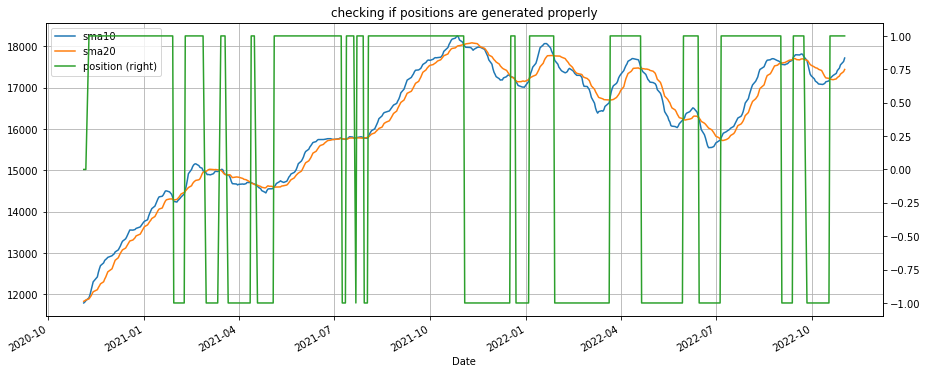

Text(0.5, 1.0, "Buy & hold' vs 'crossover strategy' cumulative returns")

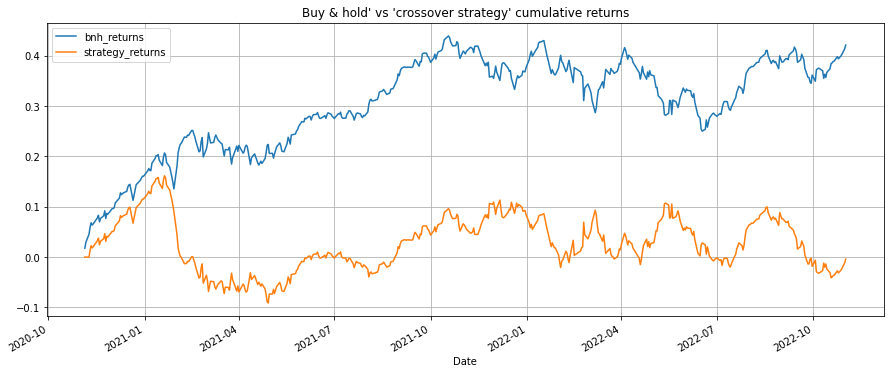

Start date,2020-11-04
End date,2022-11-01
Total months,23
,Backtest
Annual return,-1.607%
Cumulative returns,-3.119%
Annual volatility,16.796%
Sharpe ratio,-0.01
Calmar ratio,-0.07
Stability,0.00
Max drawdown,-22.82%


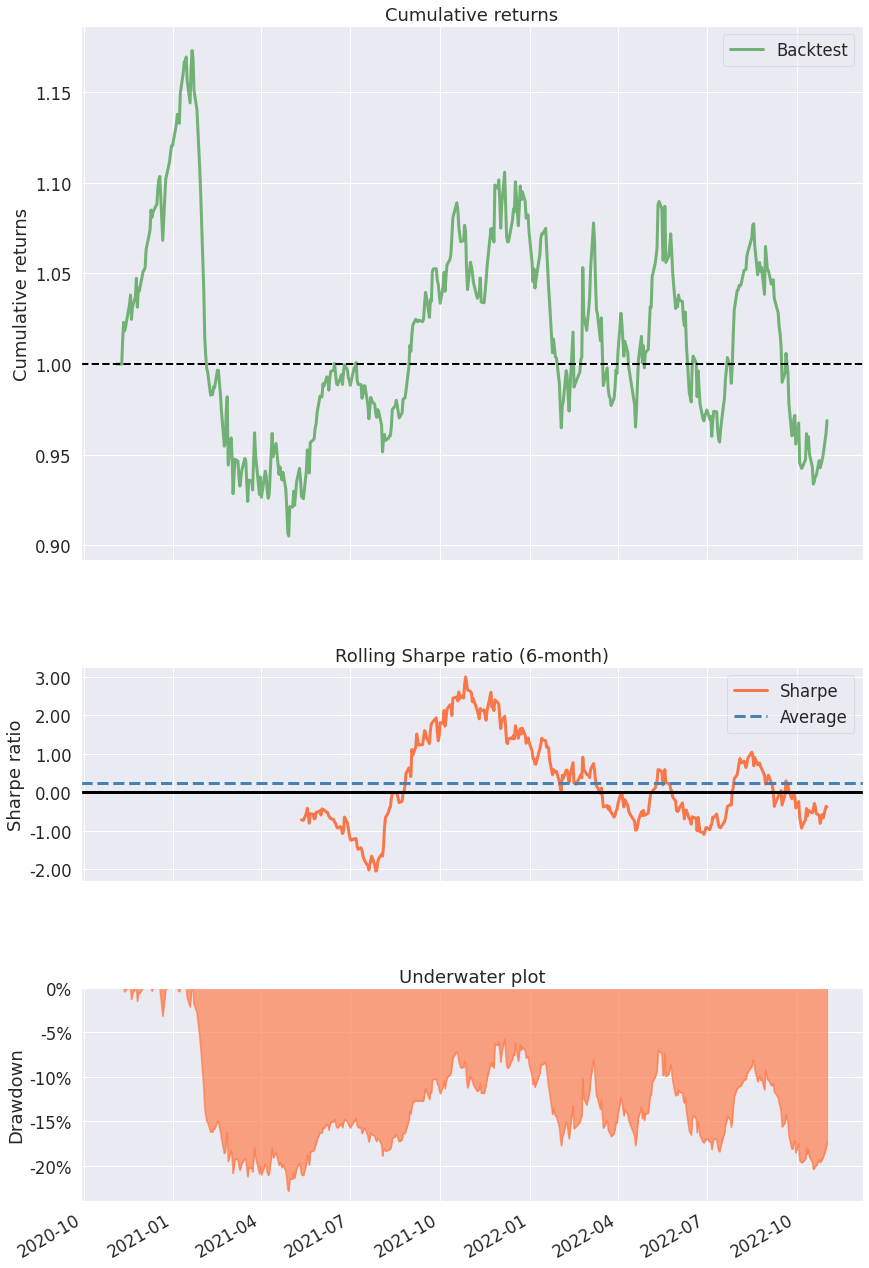

In [91]:
#Analysis
# A plot to check if the strategy is working as planned:
df3[['sma10','sma20', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title('checking if positions are generated properly')
plt.show()

# A plot to check how the strategy strategy performs relative to buy & hold
df3[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
plt.show()

# general analytics
pf.create_simple_tear_sheet(df3['strategy_returns'])

## Implementing the above strategy using OOP

In [108]:
class backtesting_crossover:
    
    def __init__(self, ticker, start_date, end_date , ma_short, ma_long):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.ma_short = ma_short
        self.ma_long = ma_long
        #Call the basic methods in the __init__ constructor itself so that they are automatically executed upon object creation
        self.fetch_data()
        self.indicators()
        self.signals()
        self.positions()
        self.returns()
        
        
    def fetch_data(self):
        self.df = yf.download(self.ticker, self.start_date, self.end_date)
        
    def indicators(self):
        self.df['ma_short'] = self.df['Adj Close'].rolling(window= self.ma_short, center=False).mean()
        self.df['ma_long'] = self.df['Adj Close'].rolling(window= self.ma_long, center=False).mean()
        self.df['ma_short_prev'] = self.df['ma_short'].shift()
        self.df['ma_long_prev'] = self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
   
    def signals(self):
        self.df['signal'] = np.where((self.df['ma_short'] > self.df['ma_long']) 
                            & (self.df['ma_short_prev'] < self.df['ma_long_prev']), 1, 0)
        
        self.df['signal'] = np.where((self.df['ma_short'] < self.df['ma_long']) 
                            & (self.df['ma_short_prev'] > self.df['ma_long_prev']), -1, self.df['signal'])
    
    def positions(self):
        self.df['position'] = self.df['signal'].replace(to_replace=0, method='ffill')
        
    def returns(self):
        self.df['bnh_returns'] = np.log(self.df['Adj Close'] / self.df['Adj Close'].shift(1))
        self.df['strategy_returns'] = self.df['bnh_returns'] * self.df['position'].shift(1)
        print('Total return:',self.df['strategy_returns'].cumsum()[-1] )
        return self.df['strategy_returns'].cumsum()[-1]
       
    def analysis(self):
        # A plot to check if the strategy is working as planned:
        self.df[['ma_short','ma_long', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title('checking if positions are generated properly')
        plt.show()

        # A plot to check how the strategy strategy performs relative to buy & hold
        self.df[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
        plt.show()

        # general analytics
        pf.create_simple_tear_sheet(self.df['strategy_returns'])

### Creating various instances/objects

Now that we have a blueprint of our strategy in the form of a class, we have much more flexibility in terms of what we want to backtest. We can conduct backtesting of different assets/stocks/indexes over different time intervals and for different values of MAs.

In [109]:
# Create start and end dates for the past 252 days
end1 = dt.datetime(2020,6,30).date()
start1 = end1-pd.Timedelta(days=3*252)
start1
end1

datetime.date(2018, 6, 5)

datetime.date(2020, 6, 30)

In [110]:
# performance of this strategy in the broad based index (Nifty 50) over the same timeframe when ma_short=10 and ma_long=20
nifty_10_20 = backtesting_crossover('^NSEI', start1, end1, 10, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.23316433565981898


In [111]:
# performance of this strategy in the broad based index (Nifty 50) over the same timeframe when ma_short=5 and ma_long=20
nifty_5_20 = backtesting_crossover('^NSEI', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.20422027143079785


In [112]:
# performance of this strategy in Indian banking index over the same timeframe when ma_short=5 and ma_long=20
Banking_5_20 = backtesting_crossover('^NSEBANK', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.30940565148930005


In [113]:
# performance of this strategy in Indian IT index over the same timeframe when ma_short=5 and ma_long=20
IT_5_20 = backtesting_crossover('^CNXIT', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.3171941980220466


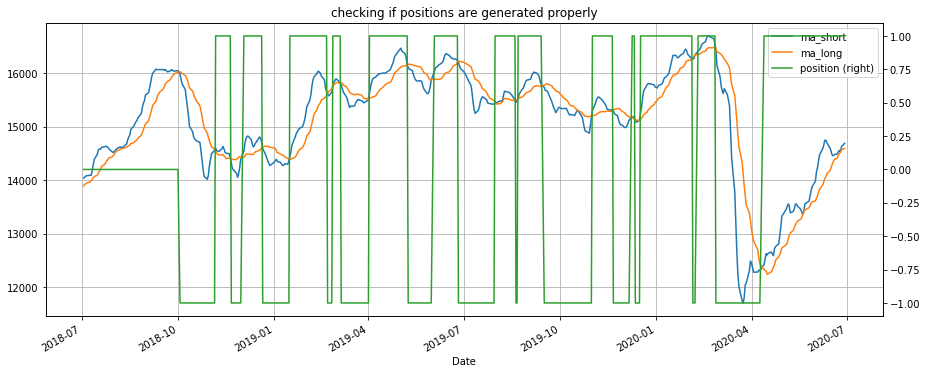

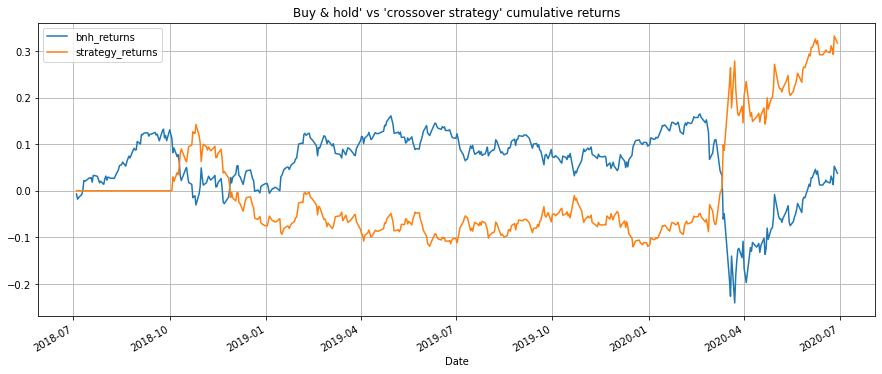

Start date,2018-07-03
End date,2020-06-29
Total months,22
,Backtest
Annual return,14.48%
Cumulative returns,29.449%
Annual volatility,25.015%
Sharpe ratio,0.67
Calmar ratio,0.59
Stability,0.06
Max drawdown,-24.362%


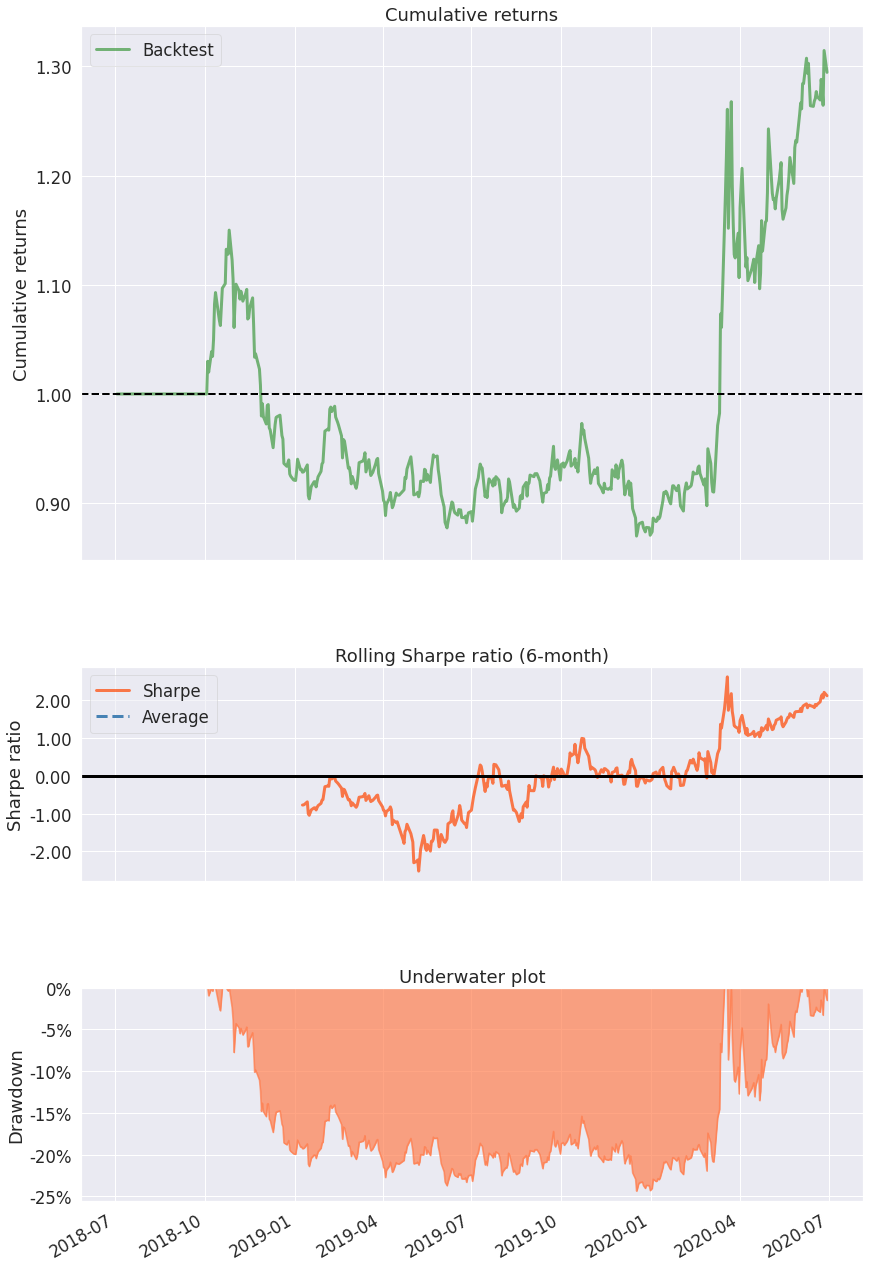

In [114]:
# for additional analysis, we can always call the analysis() function for any instance
IT_5_20.analysis()

In [81]:
microsoft_5_20 = backtesting_crossover('MSFT', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.09218481004026066


In [82]:
microsoft_10_20 = backtesting_crossover('MSFT', start1, end1, 10, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.30950030501205955


In [83]:
apple_10_20 = backtesting_crossover('AAPL', start1, end1, 10, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 1.2748897262247143


In [84]:
apple_5_20 =  backtesting_crossover('AAPL', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 1.3321259629346298


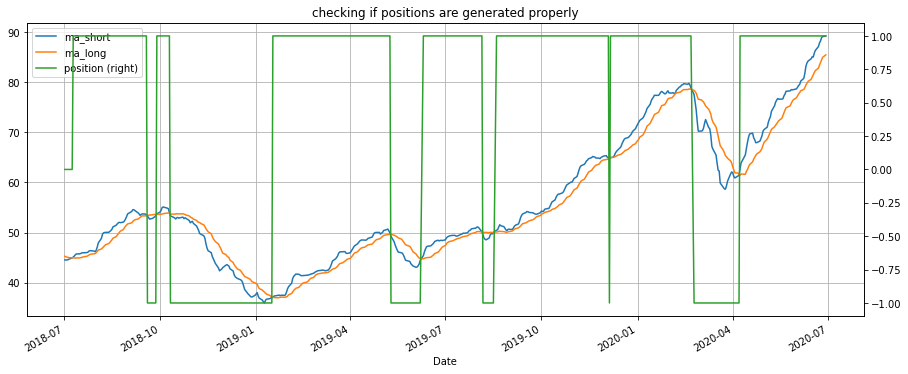

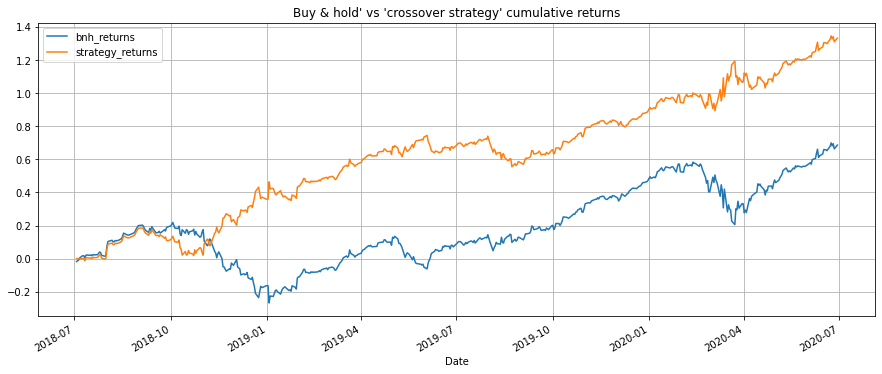

Start date,2018-07-02
End date,2020-06-29
Total months,23
,Backtest
Annual return,82.813%
Cumulative returns,232.609%
Annual volatility,36.106%
Sharpe ratio,1.86
Calmar ratio,4.60
Stability,0.94
Max drawdown,-18.004%


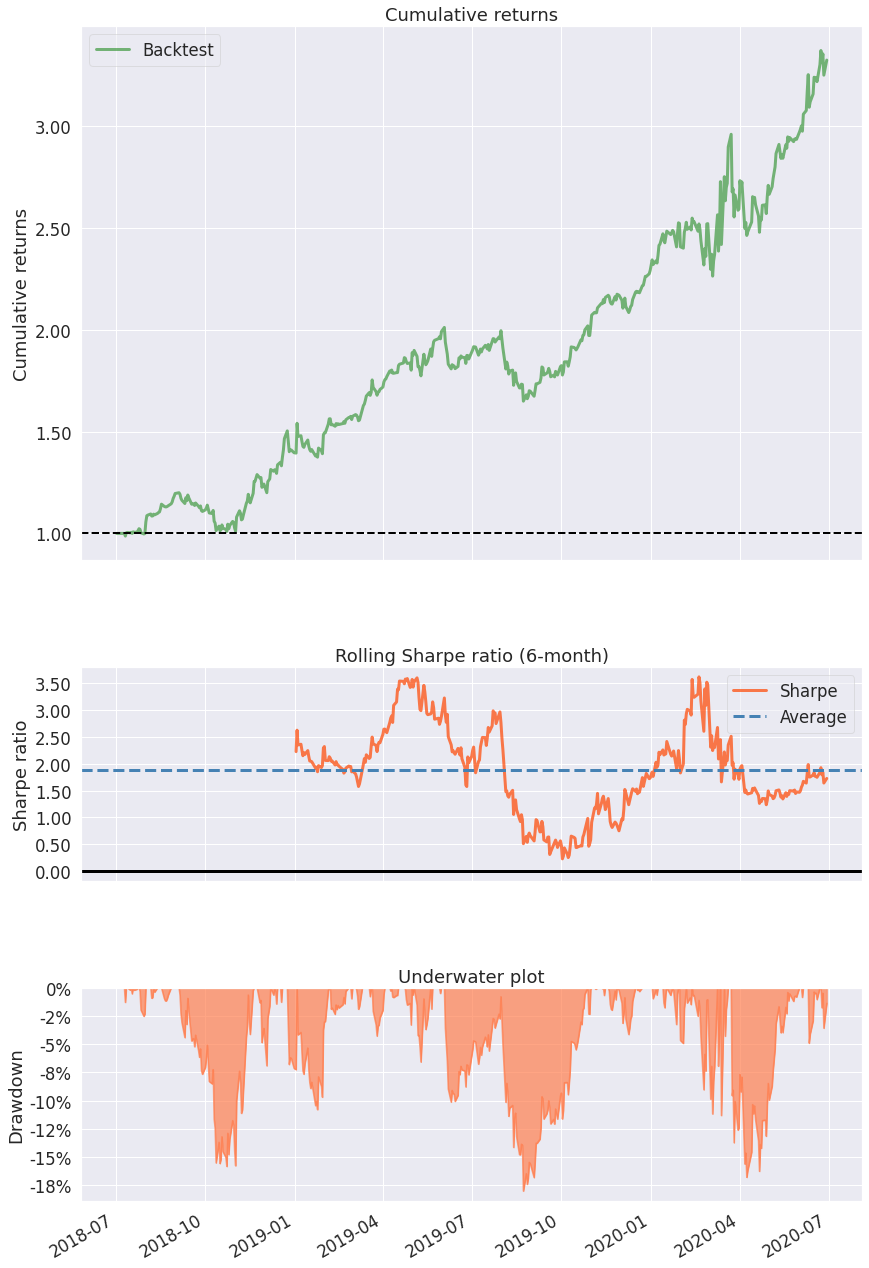

In [85]:
apple_5_20.analysis()

## Using inheritance, static methods & class methods to create new/modify existing strategies

In [ ]:
# We can always create new blueprints based on the existing blueprints
# Suppose now we want a class that backtests the crossover strategy but for exponential moving averages(EMA)
# We can make use of the code we wrote earlier on SMA and selectively tweak it

In [115]:
class backtesting_EMA_crossover(backtesting_crossover):
    
    #Simply define a new indicators method and get all other methods and properties from parent class
    def indicators(self):
        self.df['ma_short'] = self.df['Adj Close'].ewm(span= self.ma_short, adjust=False).mean()
        self.df['ma_long'] = self.df['Adj Close'].ewm(span= self.ma_long, adjust=False).mean()
        self.df['ma_short_prev'] = self.df['ma_short'].shift()
        self.df['ma_long_prev'] = self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
        
    # A static method
    @staticmethod
    def date_of_backtest():
        print('Date of backtest:',pd.datetime.now().date())
        
    # A class method
    @classmethod
    def about_this_backtest(cls):
        print('We are backtesting the short-long EMA crossover strategy.')

In [116]:
apple_10_20_ema = backtesting_EMA_crossover('AAPL', start1, end1, 10, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 1.091343607813981


In [117]:
apple_5_20_ema = backtesting_EMA_crossover('AAPL', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 1.2373907672918165


In [118]:
# calling the class method
apple_5_20_ema.about_this_backtest()

We are backtesting the short-long EMA crossover strategy.


In [119]:
# calling the static method
apple_5_20_ema.date_of_backtest()

Date of backtest: 2022-11-02


## Testing various strategies on the same asset/ Optimization

In [120]:
fast_ma_list =[5,10,15,20]
slow_ma_list =[25,50,100]

fast_ma=[]
slow_ma=[]
net_returns= []

for i in fast_ma_list:
    for j in slow_ma_list:
        print('For',i,j)
        a = backtesting_crossover('AAPL', start1, end1, i, j)
        fast_ma.append(i)
        slow_ma.append(j)
        net_returns.append(a.returns())

For 5 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.3943142614088853
Total return: 1.3943142614088853
For 5 50
[*********************100%***********************]  1 of 1 completed
Total return: 1.0400044979685639
Total return: 1.0400044979685639
For 5 100
[*********************100%***********************]  1 of 1 completed
Total return: 0.5571514246052723
Total return: 0.5571514246052723
For 10 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.1981152028722433
Total return: 1.1981152028722433
For 10 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.7859410850505387
Total return: 0.7859410850505387
For 10 100
[*********************100%***********************]  1 of 1 completed
Total return: 0.17602317274318777
Total return: 0.17602317274318777
For 15 25
[*********************100%***********************]  1 of 1 completed
Total return: 1.2820283274054842
Total return: 1.2

In [121]:
#Convert into a DataFrame
results = pd.DataFrame({'fast_ma':fast_ma,'slow_ma': slow_ma,'net_returns':net_returns})
results

,fast_ma,slow_ma,net_returns
0,5,25,1.394314
1,5,50,1.040004
2,5,100,0.557151
3,10,25,1.198115
4,10,50,0.785941
5,10,100,0.176023
6,15,25,1.282028
7,15,50,0.901325
8,15,100,0.329336
9,20,25,0.962122


In [122]:
# Sorting to find the best set of parameters
results.sort_values(by='net_returns',ascending=False)

,fast_ma,slow_ma,net_returns
0,5,25,1.394314
6,15,25,1.282028
3,10,25,1.198115
1,5,50,1.040004
9,20,25,0.962122
7,15,50,0.901325
4,10,50,0.785941
10,20,50,0.704283
2,5,100,0.557151
8,15,100,0.329336


## Testing the same strategy on various assets

In [124]:
stock_list = [   'BAJFINANCE.NS',
                 'BAJAJFINSV.NS',
                 'BPCL.NS',
                 'BHARTIARTL.NS',
                 'INDUSTOWER.NS',
                 'BRITANNIA.NS',
                 'CIPLA.NS',
                 'COALINDIA.NS',
                 'DRREDDY.NS',
                 'EICHERMOT.NS',
                 'GAIL.NS',
                 'GRASIM.NS'  ]

stock_name = []
net_returns = []

In [125]:
 for stock in stock_list:
        print('Backtesting result for',stock)
        a = backtesting_crossover(stock, start1, end1, 5, 25)
        stock_name.append(stock)
        net_returns.append(a.returns())

Backtesting result for BAJFINANCE.NS
[*********************100%***********************]  1 of 1 completed
Total return: 1.0400557314956886
Total return: 1.0400557314956886
Backtesting result for BAJAJFINSV.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.5289669251356014
Total return: 0.5289669251356014
Backtesting result for BPCL.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.2708867656392396
Total return: -0.2708867656392396
Backtesting result for BHARTIARTL.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.29088279556567004
Total return: -0.29088279556567004
Backtesting result for INDUSTOWER.NS
[*********************100%***********************]  1 of 1 completed
Total return: -0.4433368275304362
Total return: -0.4433368275304362
Backtesting result for BRITANNIA.NS
[*********************100%***********************]  1 of 1 completed
Total return: 0.5849970944312002


In [126]:
#Convert into a DataFrame
results = pd.DataFrame({'Stock':stock_name,'net_returns':net_returns})
results

,Stock,net_returns
0,BAJFINANCE.NS,1.040056
1,BAJAJFINSV.NS,0.528967
2,BPCL.NS,-0.270887
3,BHARTIARTL.NS,-0.290883
4,INDUSTOWER.NS,-0.443337
5,BRITANNIA.NS,0.584997
6,CIPLA.NS,0.675579
7,COALINDIA.NS,-0.363290
8,DRREDDY.NS,-0.153980
9,EICHERMOT.NS,0.036342


In [127]:
# Sorting to find the best stocks to apply the strategy
results.sort_values(by='net_returns',ascending=False)

,Stock,net_returns
0,BAJFINANCE.NS,1.040056
6,CIPLA.NS,0.675579
5,BRITANNIA.NS,0.584997
1,BAJAJFINSV.NS,0.528967
11,GRASIM.NS,0.226808
9,EICHERMOT.NS,0.036342
8,DRREDDY.NS,-0.153980
2,BPCL.NS,-0.270887
3,BHARTIARTL.NS,-0.290883
7,COALINDIA.NS,-0.363290


## Homework 1:
- Create a class called 'four_wheeler' which has:
    - a class attribute: 'number_of_tyres' initialized to a value of 4.
    - three instance attributes: 'manufacturer', 'model' and  'color'.
    - an instance method which prints the details about the car based on the three instance attribute and the class attribute.<br><br>
    
- Create an instance of the above class with the following attributes:
    - 'manufacturer': 'BMW'
    - 'model': 5 series
    - 'color': Blue

## Homework 2:
- Implement the other strategies you have learnt in OOP format, for e.g., 
    - the Big Moves Monday strategy
    - Bollinger bands strategy
    - MACD strategy

## References

 - http://hilpisch.com/py4fi_oop_epat.html